<font color=RED><font size="6"> IBM EMPLOYEE ATTRITION PROJECT </font>

# STEPS
<font color=blue><font size="4"> 
UNDERSTANDING THE DATA AND DATA PREPARATION STEPS
    
FEATURE ENGEERING : CAREFUL PREPROCESSING INTO MORE MEANIFUL FEATURES

FEATURE SELECTION : IMPORTANT FEATURES BASED UPON DEPENDENCY WITH TARGET VARIABLE

MULTICOLLINEARITY

MODEL FITTING

GOODNESS OF FIT

SMOTE </font>


In [306]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize']=10,10
rcParams['font.size']=22
rcParams['xtick.labelsize']=16
rcParams['ytick.labelsize']=16
matplotlib.rcParams.update({'font.size':22})
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [307]:
HRattrition=pd.read_csv("D:\\Ria\\AMITY\\4th semester\\PROJECT\\HR_Attrition\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [308]:
HRattrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


<font color=blue><font size="4"> **The Attrition dataset had 1470 observations with 35 variables. Out of the 35 variables, there exists one target variable Attrition with possible outcomes Yes and No.** </font>


FEW OF VARIABLES MENTIONED BELOW CONSIDERED

<font color=blue><font size="2"> Attrition : Whether the particular employee has attrite or not
BusinessTravel : 3 categories based on their office travel frequency
    
Department : Which department in IBM each employee is allotted

EducationField : Employees Education background , Medical or Technical or LifeSciences

Gender: M/F

JobRole: Role assigned

MaritalStatus: Single or married or divorced

Over18 : y/n

OverTime : have they done overtime

Age : Age of the employee

DailyRate : Employees's per day rate 'dollars'

DistancefromHome : Distance from home in km

Education : Employees level of education ratings [1 - 4]

Employeeno : unique employee number

Environment Satisfaction : Satisfication level with IBM's environment

HourlyRate : Employees hourly rate ($)

JobInvolvement- ratings according to his involvement in the project

Joblevel - senority level 

RelationshipSatisfaction - Satisfication level with his/her own relationship </font>




# DATA PREPARATION AND UNDERSTANDING

In [309]:
# ---> WE WILL START WITH UNDERSTANDING THE TYPE OF VARIABLES WE HAVE
#SOME ORDINAL DATA TYPES HAVE BEEN CONSIDERED AS INTEGER
HRattrition.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [310]:
(HRattrition.dtypes=='object').sum()

9

# Change of dtype

## change of variables from integer to float

In [311]:
HRattrition[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]=HRattrition[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].astype('float64')

# change of variables from integer to object

In [312]:
HRattrition[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]=HRattrition[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']].astype('category')

# CHECK OF DATAYPES AGAIN

In [313]:
HRattrition.select_dtypes('object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Text(0,0.5,'Attrition')

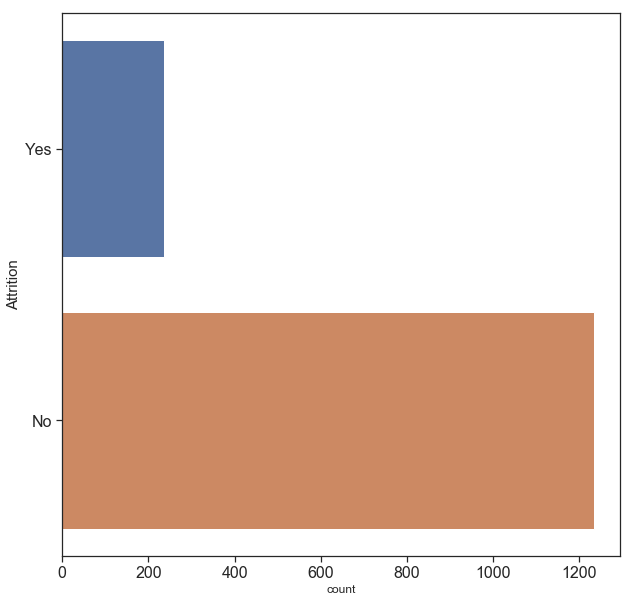

In [314]:
x='Attrition'
sns.countplot(y=x,data=HRattrition)
plt.ylabel(x,fontsize=15)

In [315]:
list(HRattrition.select_dtypes(include=['O','category']).columns)[0:1]

['Attrition']

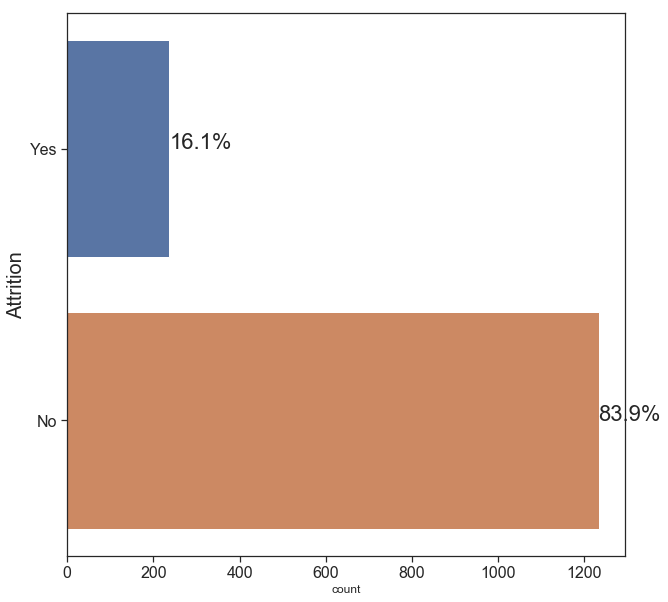

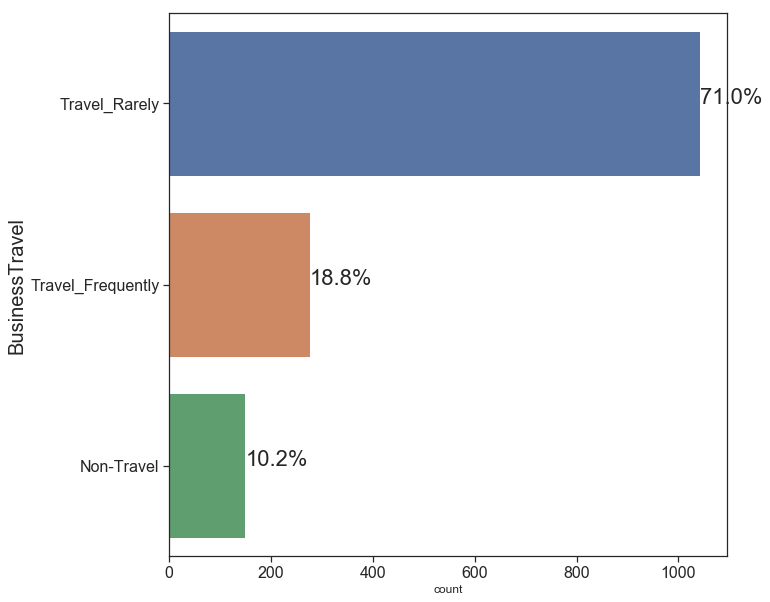

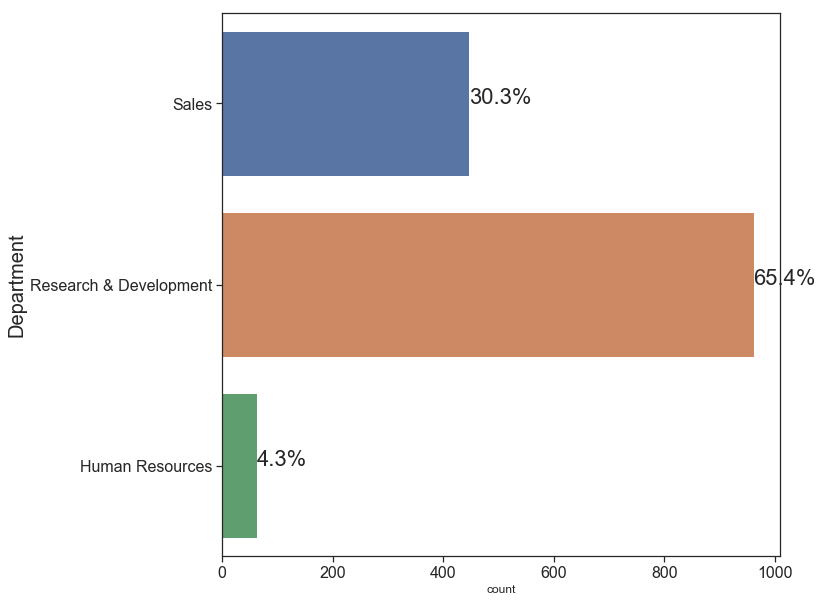

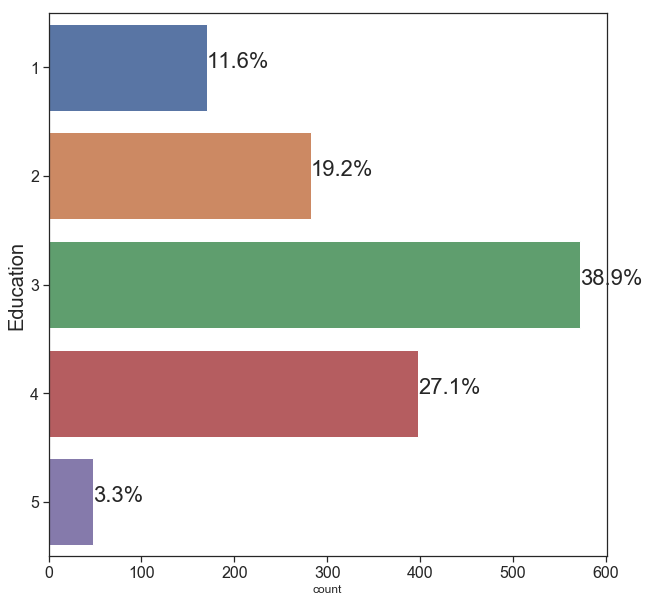

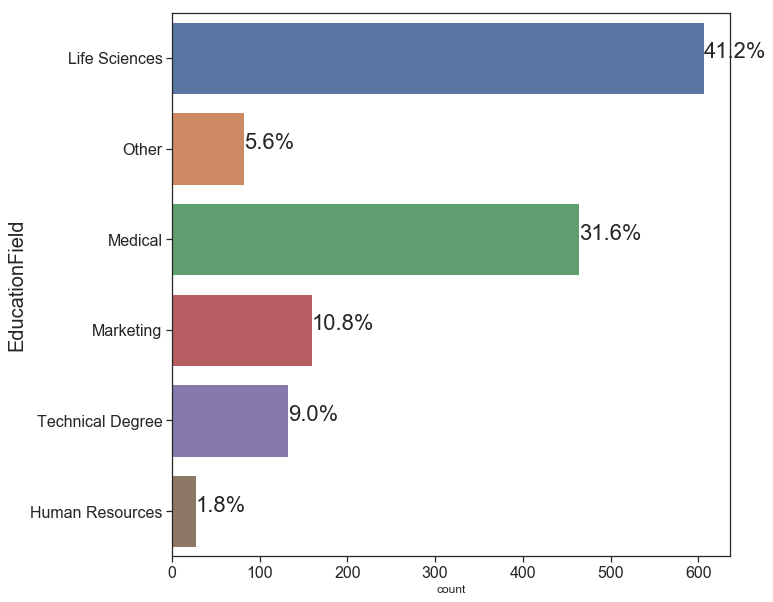

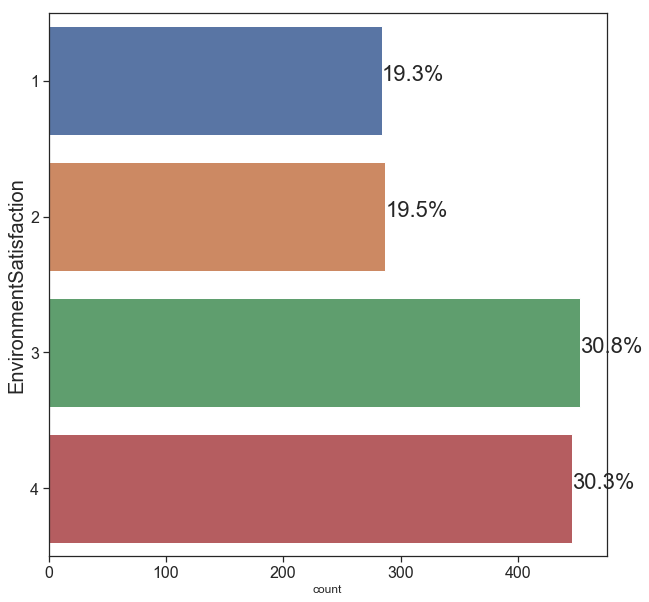

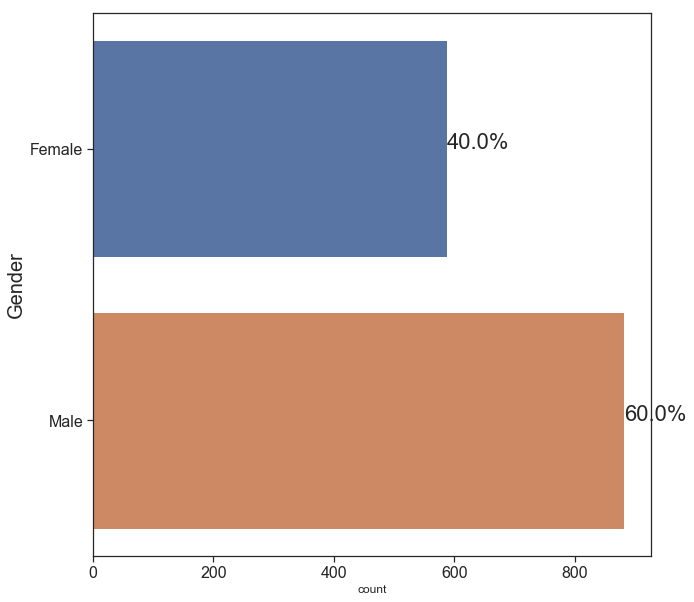

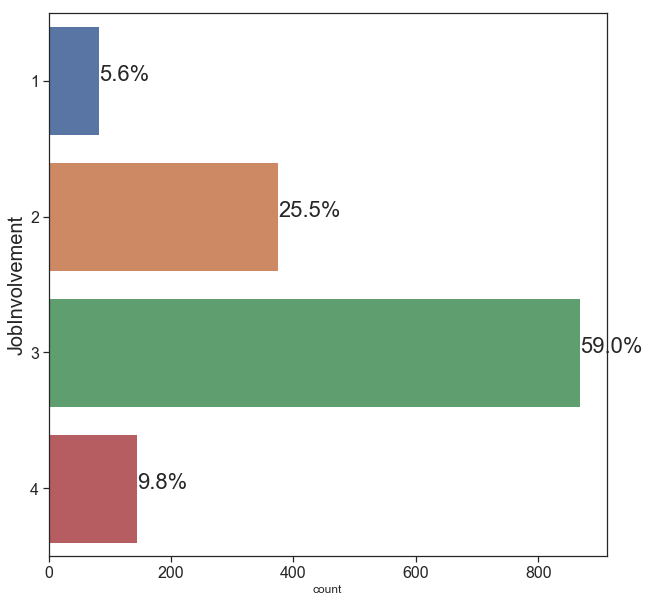

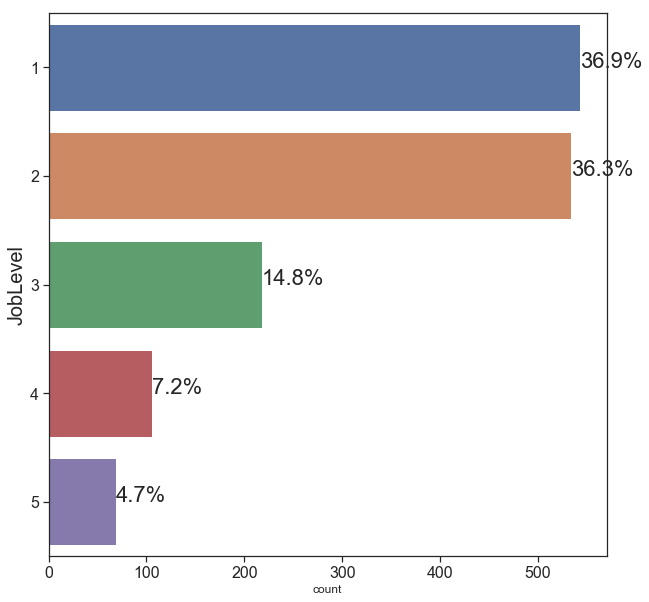

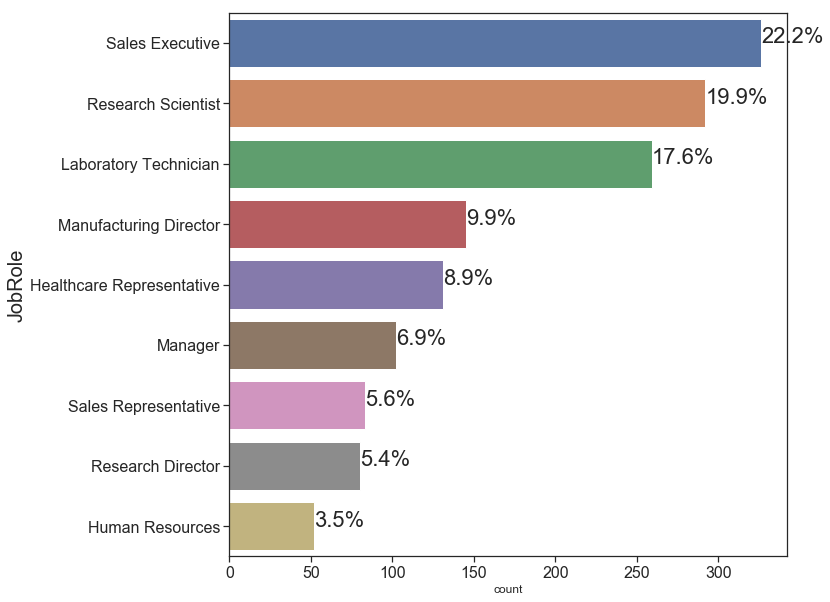

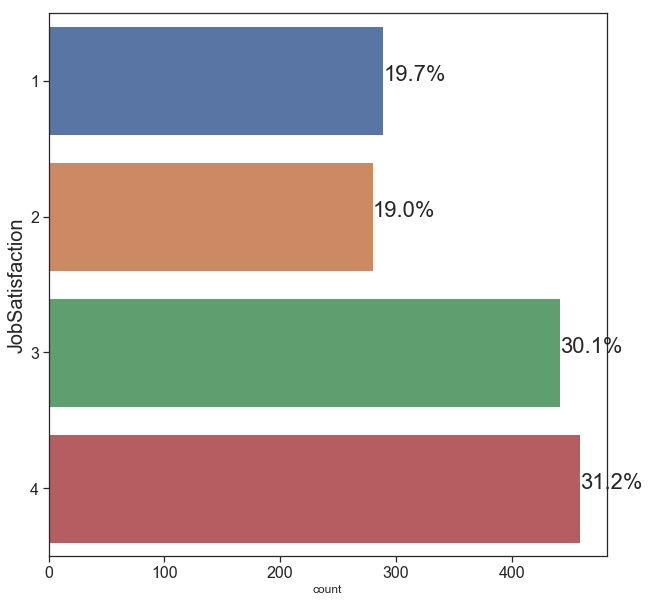

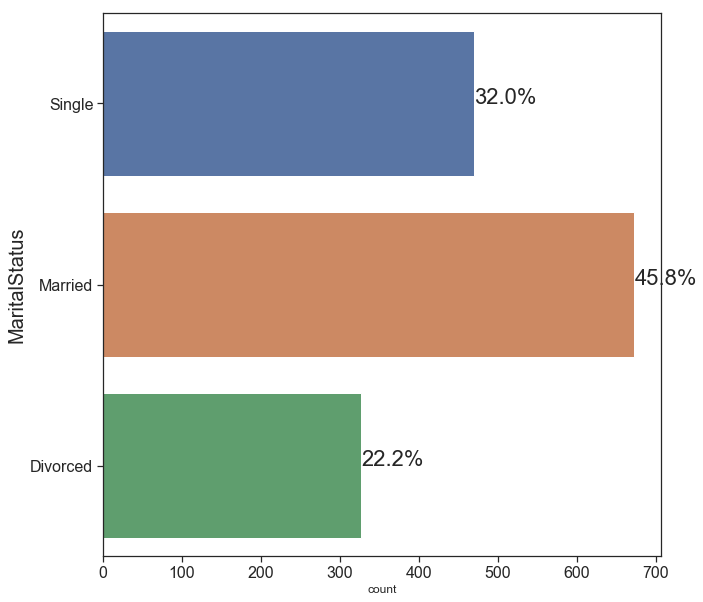

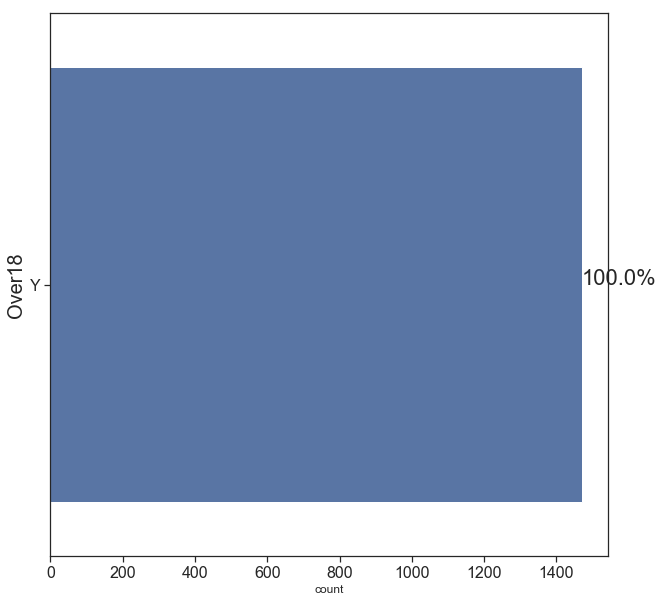

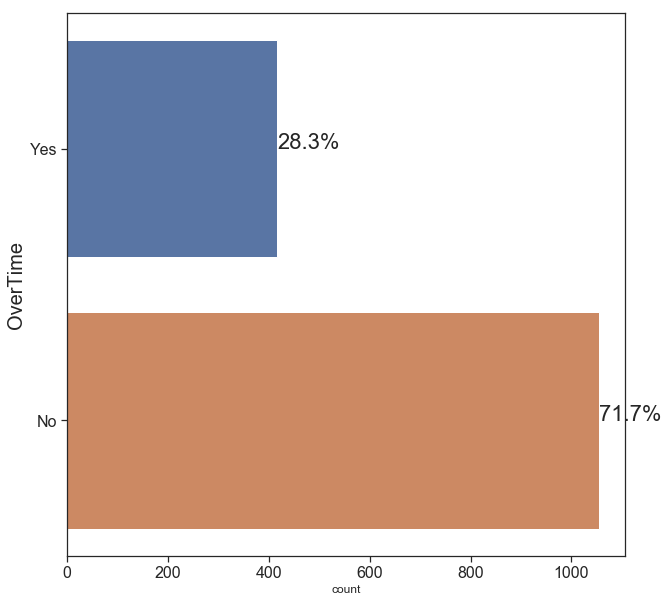

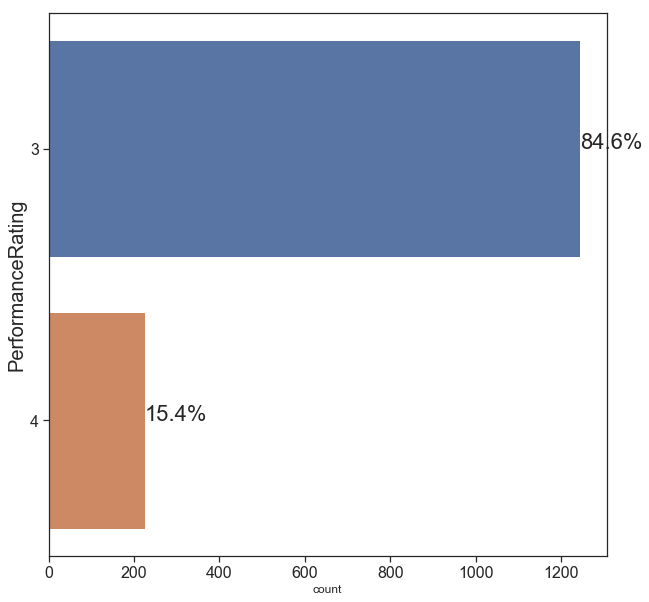

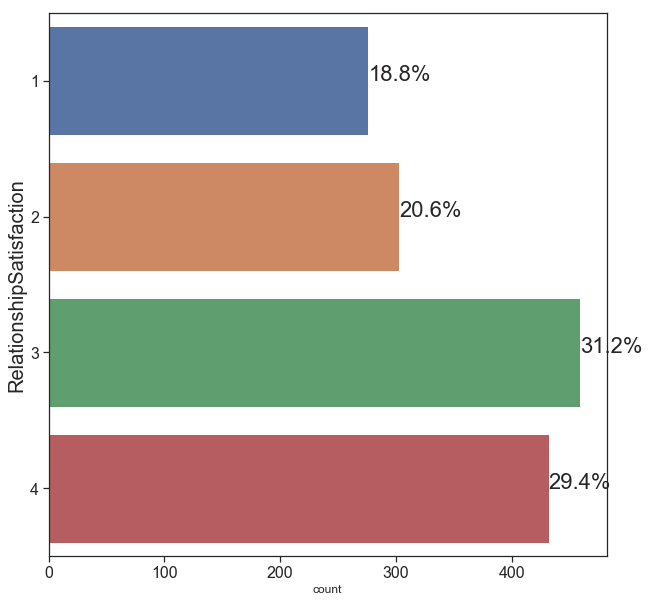

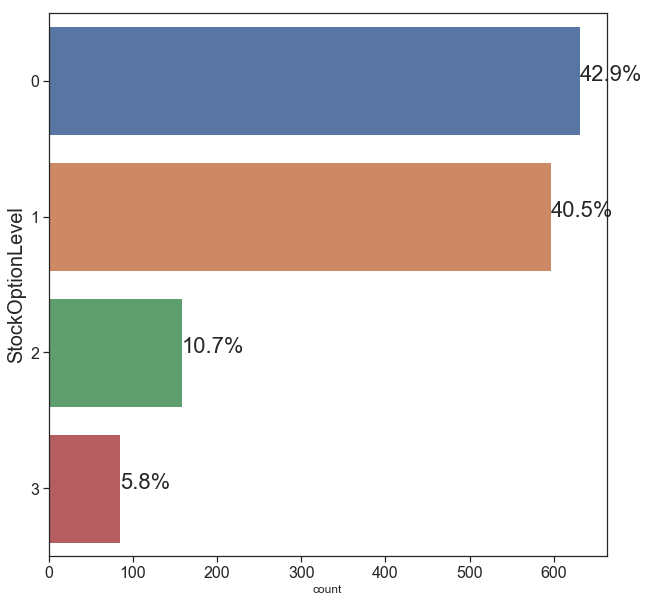

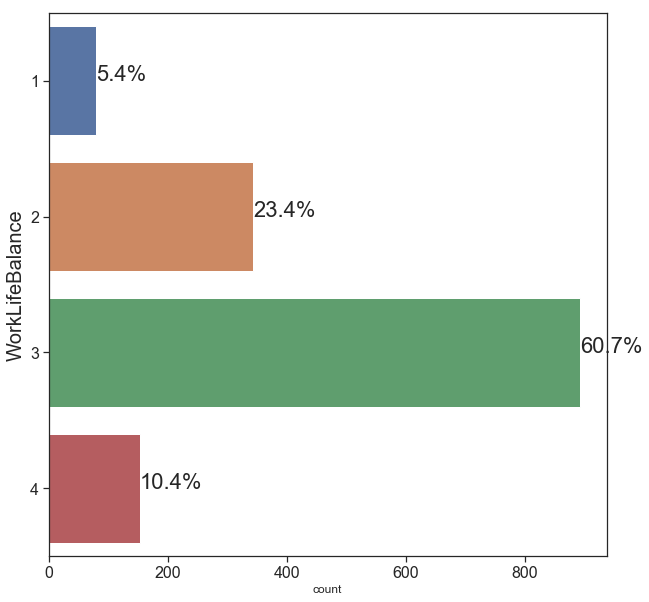

In [316]:
def bargraph(x):

    #x=HRattrition.columns[1]
    
    
    ax=sns.countplot(y=str(x),data=HRattrition)
    plt.ylabel(str(x),fontsize=20)
    total=len(HRattrition)
    for p in ax.patches:
        percentage='{:.1f}%'.format(100*p.get_width()/total)
        r=p.get_x()+p.get_width() 
        s=p.get_y()+p.get_height()/2
        ax.annotate(percentage,(r,s))
    plt.show()
    
    return ax
    
    
    #ax.annotate(percentage)
#total=len(HRattrition[x])
#for p in ax.patches:
    #percentage='{:.1f}%'.format(100*p.get_width()/total)
    #ax.annotate(percentage)
#plt.show()
    
   
    

for variable in list(HRattrition.select_dtypes(include=['O','category']).columns[0:]):
    bargraph(variable)
%matplotlib inline

C:\Users\riasa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\riasa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


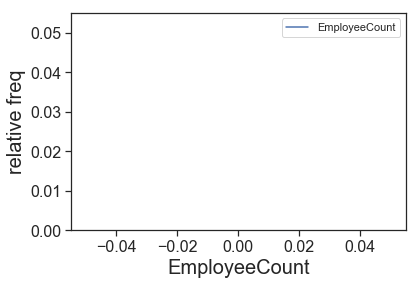

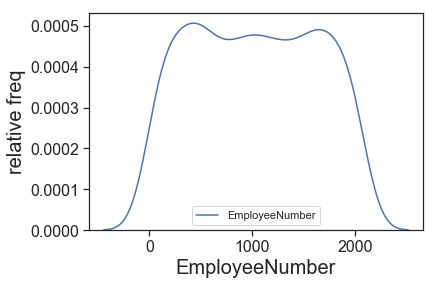

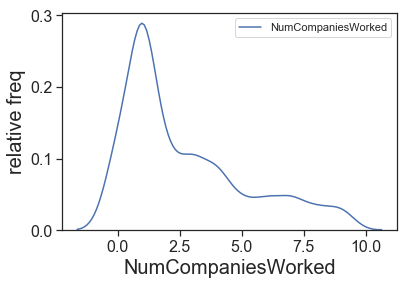

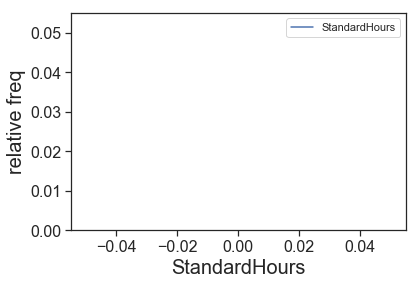

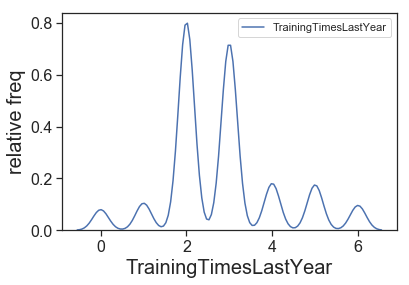

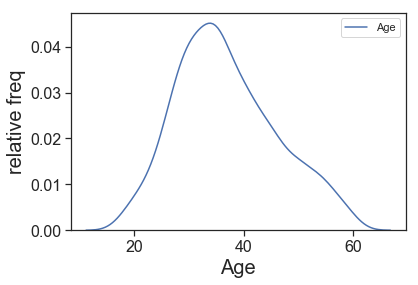

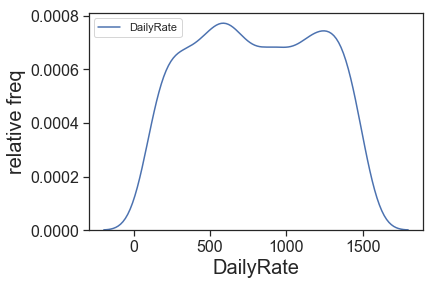

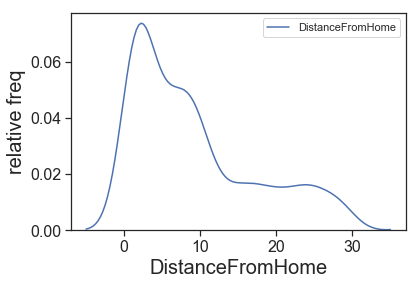

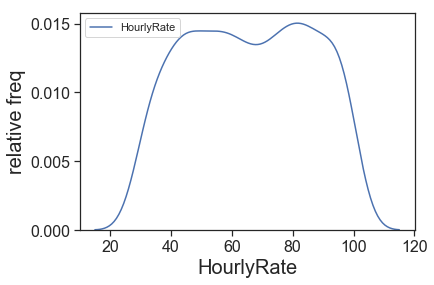

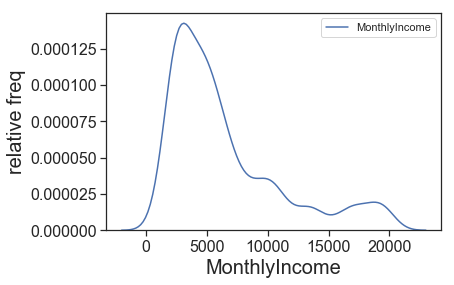

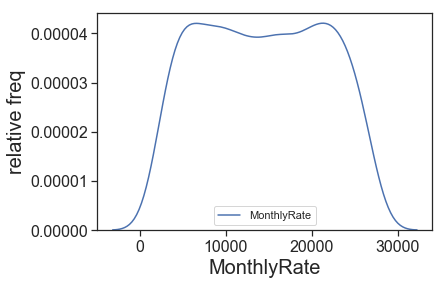

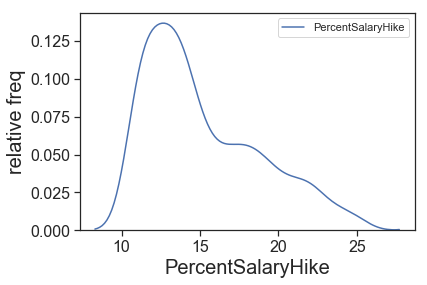

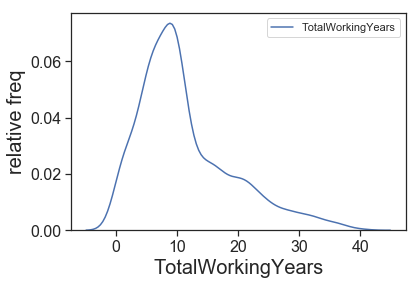

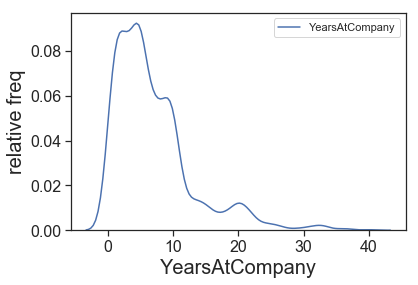

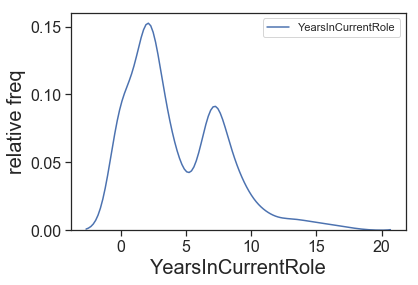

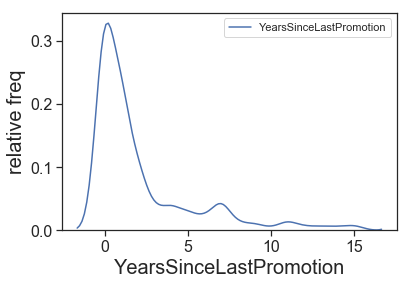

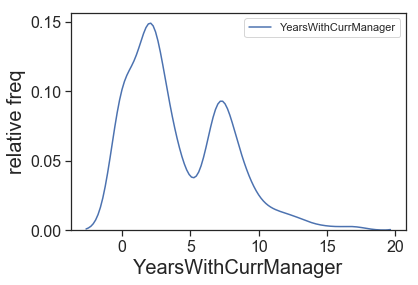

In [317]:

def histgraph(x):

    #x=HRattrition.columns[1]
    
    ax=sns.kdeplot(HRattrition[x],facecolor='g')
    plt.xlabel(x)
    plt.ylabel('relative freq')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    
    plt.show()
    
    
    return ax
    

    
   
    

for columns in list(HRattrition.select_dtypes('int64').columns)+list(HRattrition.select_dtypes('float64').columns):
    histgraph(columns)


### DESCRIPTIVE STATISTICS

In [318]:
def descriptivestats(x):
    return pd.Series([x.std(),x.mean(),x.median(),x.min(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.1),x.quantile(0.25),x.quantile(0.5),x.quantile(0.75),x.quantile(0.9),x.quantile(0.95),x.quantile(0.99),x.max()],index=['std','mean','median','min','1 percentile','5 percentile','10 percentile','25 percentile','50 percentile','75 percentile','90 percentile','95 percentile','99 percentile','max'])
HRattrition[list(HRattrition.select_dtypes('int64').columns)+list(HRattrition.select_dtypes('float64').columns)].apply(descriptivestats)

,EmployeeCount,EmployeeNumber,NumCompaniesWorked,StandardHours,TrainingTimesLastYear,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
std,0.0,602.024335,2.498009,0.0,1.289271,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
mean,1.0,1024.865306,2.693197,80.0,2.799320,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
median,1.0,1020.500000,2.000000,80.0,3.000000,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
min,1.0,1.000000,0.000000,80.0,0.000000,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1 percentile,1.0,19.690000,0.000000,80.0,0.000000,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5 percentile,1.0,96.450000,0.000000,80.0,1.000000,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10 percentile,1.0,198.900000,0.000000,80.0,2.000000,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25 percentile,1.0,491.250000,1.000000,80.0,2.000000,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50 percentile,1.0,1020.500000,2.000000,80.0,3.000000,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75 percentile,1.0,1555.750000,4.000000,80.0,3.000000,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000


In [319]:
# BIVARIATE ANALYSIS

def detailed_analysis_cont(x):

        HRattrition['new']=pd.cut(HRattrition[x],bins=10)
        data=pd.crosstab(HRattrition['new'],HRattrition['Attrition']).apply(lambda r:r/r.sum(),axis=1)
        ax=data.plot.bar(stacked=True)
        plt.xlabel(x,fontsize=20)
        ax.xaxis.label.set_size(20)
        HRattrition.drop(columns='new',inplace=True)




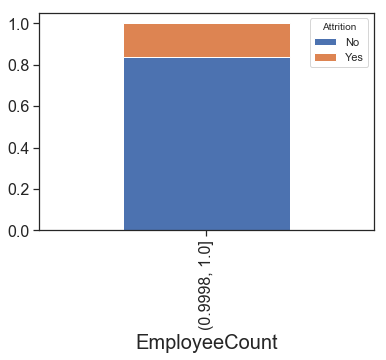

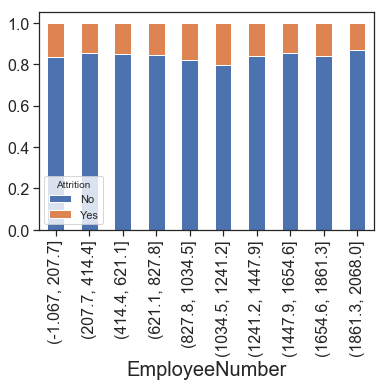

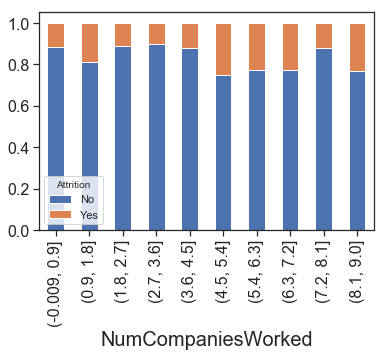

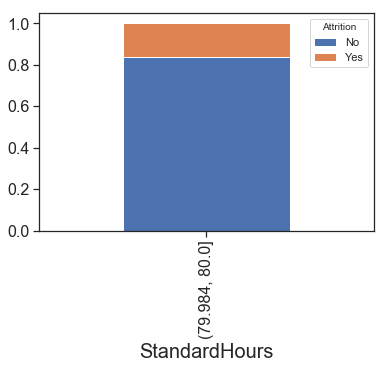

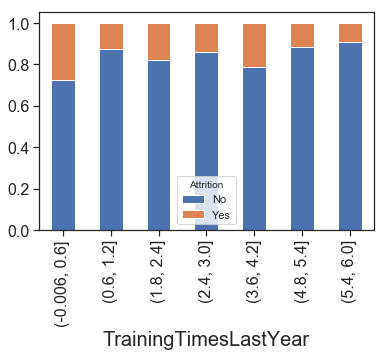

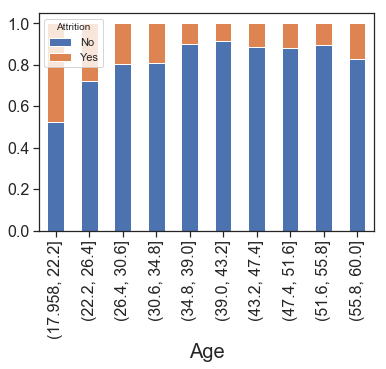

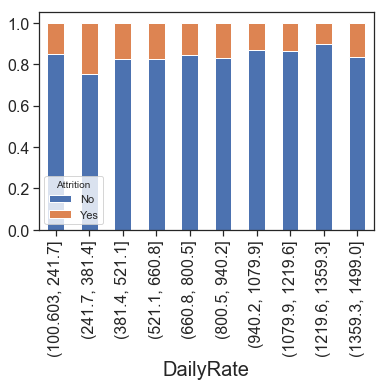

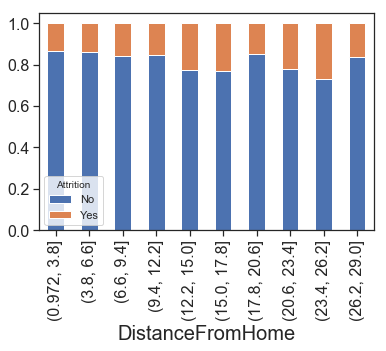

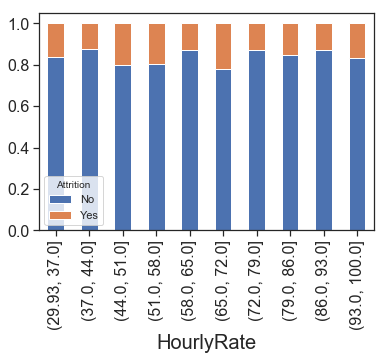

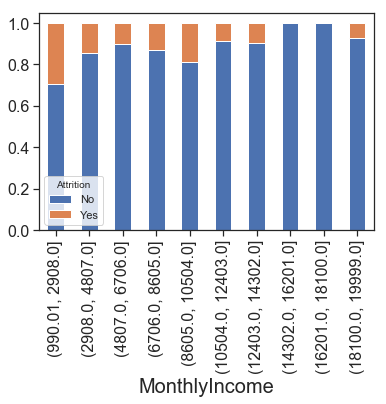

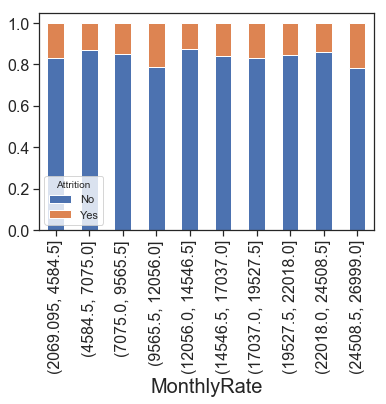

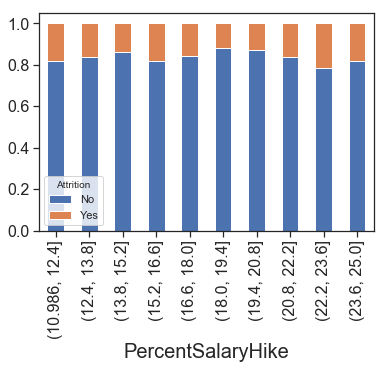

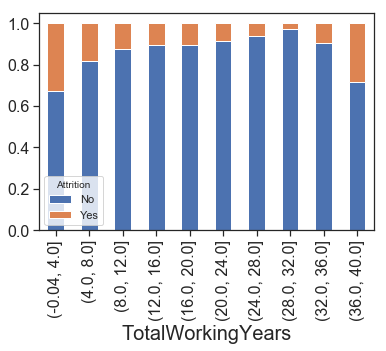

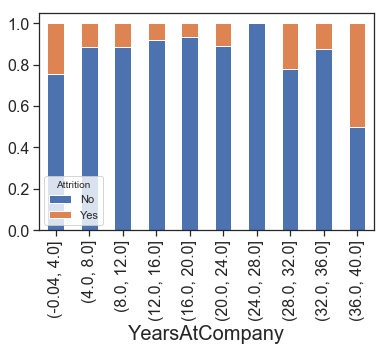

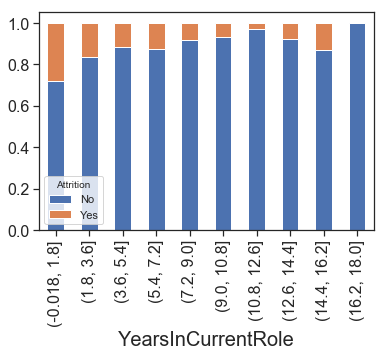

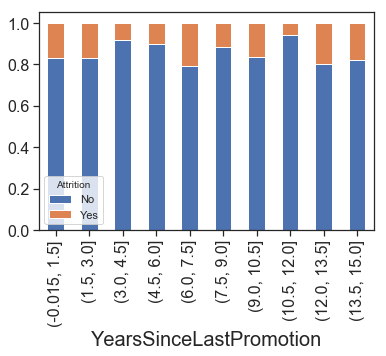

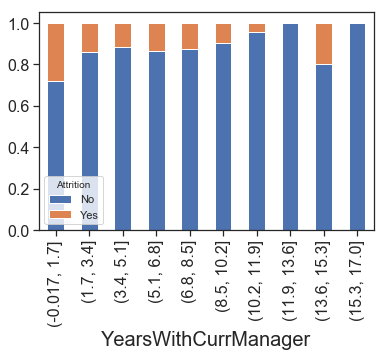

In [320]:
for columns in (list(HRattrition.select_dtypes('int64').columns)+list(HRattrition.select_dtypes('float64').columns)):
    detailed_analysis_cont(columns)

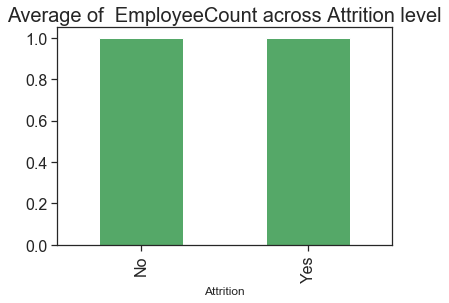

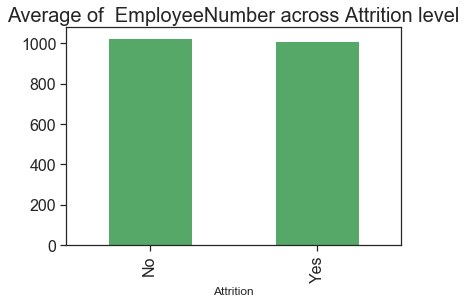

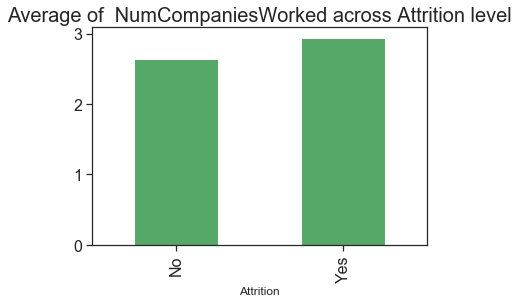

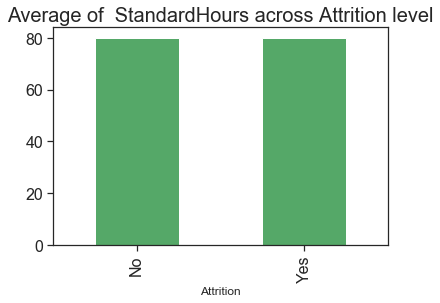

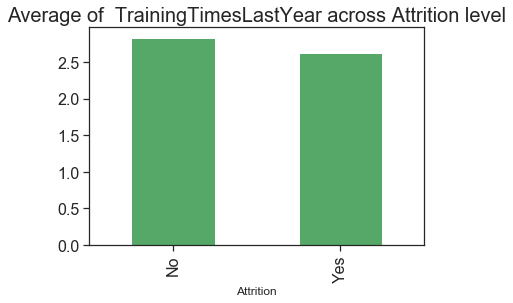

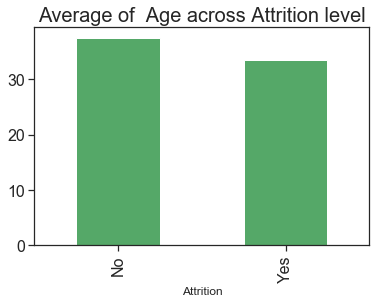

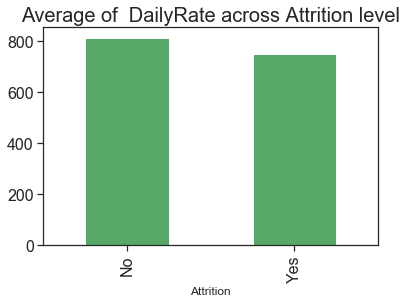

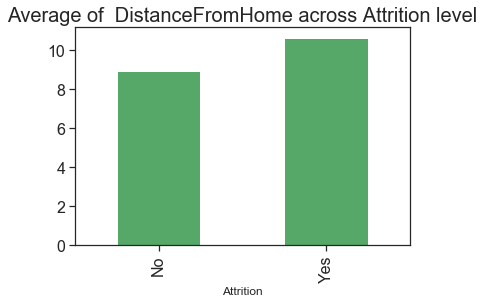

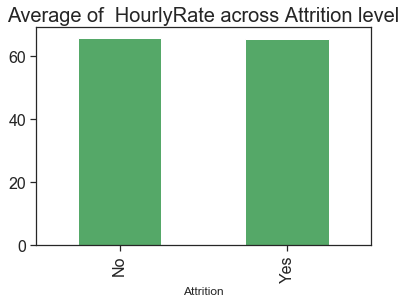

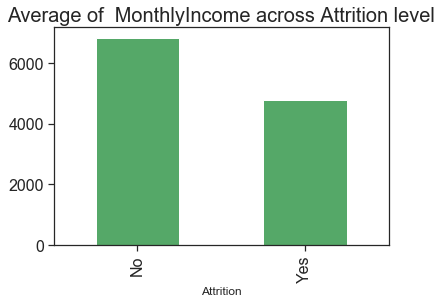

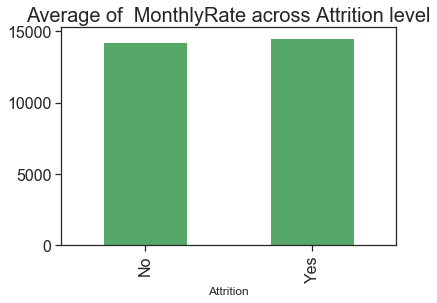

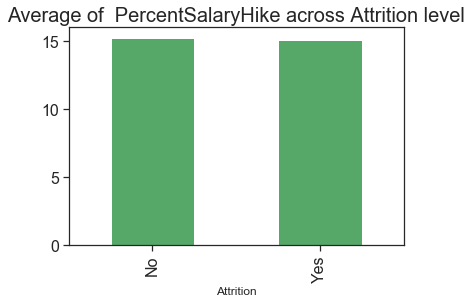

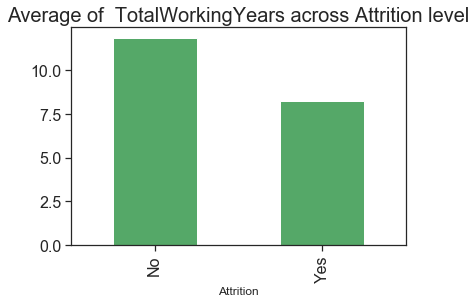

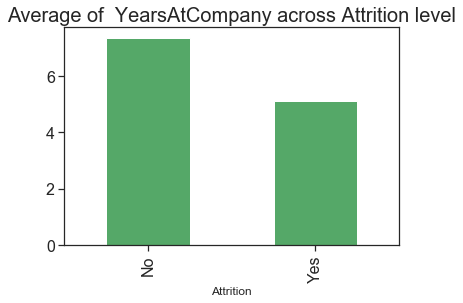

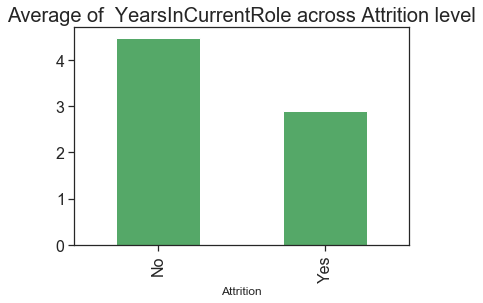

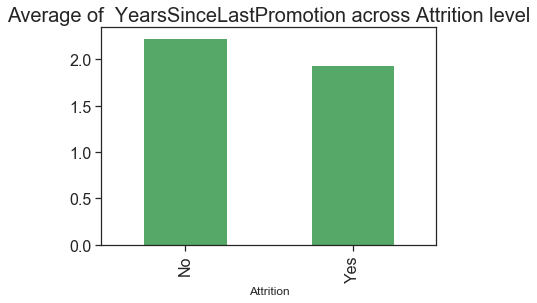

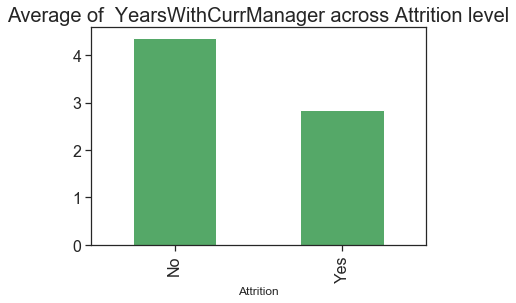

In [321]:
def average_across_attrition(x):
    ax=HRattrition.groupby(HRattrition['Attrition'])[x].mean().plot.bar(color='g')
    title=f'Average of  {x} across Attrition level'
    plt.title(title,fontsize=20)
    plt.show()
    return ax
for columns in (list(HRattrition.select_dtypes('int64').columns)+list(HRattrition.select_dtypes('float64').columns)):
    average_across_attrition(columns)

# FEATURE SELECTION BASED ON AUDIT
EMPLOYEE COUNT ,STANDARD HOURS - ZERO VARIANCE

EMPLOYEE NUMBER - UNIQUE 

In [322]:
remove=['EmployeeCount','EmployeeNumber','StandardHours']

[element for element in (list(HRattrition.select_dtypes('int64').columns)+list(HRattrition.select_dtypes('float64').columns)) if element not in remove]

['NumCompaniesWorked',
 'TrainingTimesLastYear',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [323]:
numericvariables=['NumCompaniesWorked',
 'TrainingTimesLastYear',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [324]:
['OverTime', 'JobRole', 'JobLevel', 'StockOptionLevel',
       'MaritalStatus', 'JobInvolvement', 'BusinessTravel',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'Department']

['OverTime',
 'JobRole',
 'JobLevel',
 'StockOptionLevel',
 'MaritalStatus',
 'JobInvolvement',
 'BusinessTravel',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'Department']

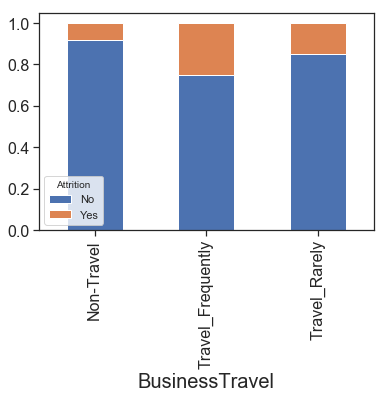

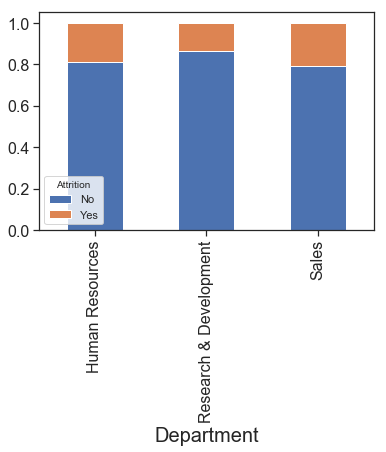

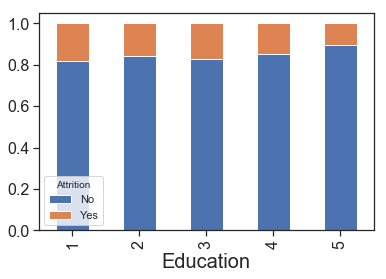

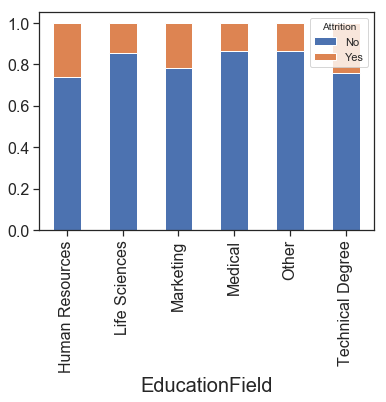

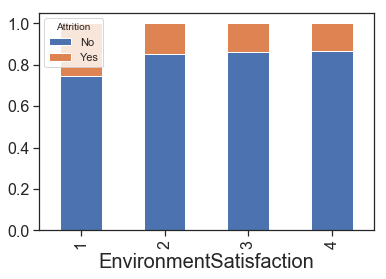

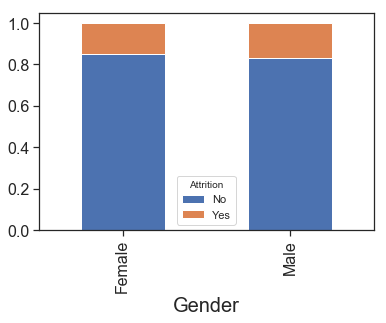

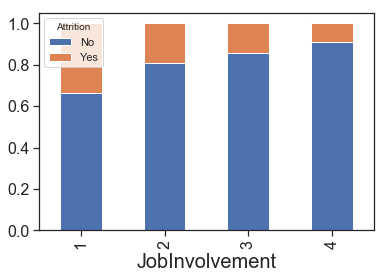

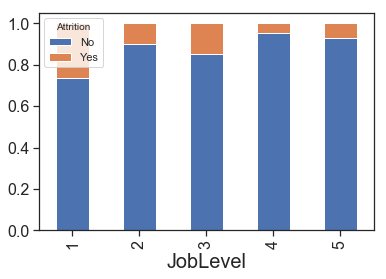

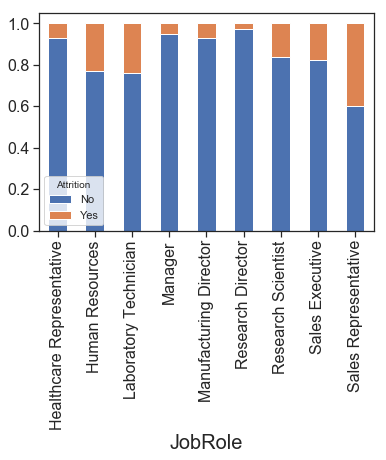

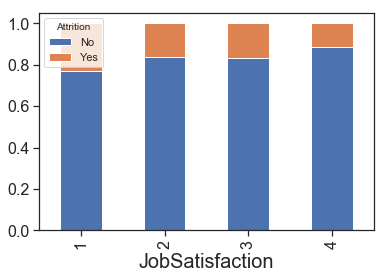

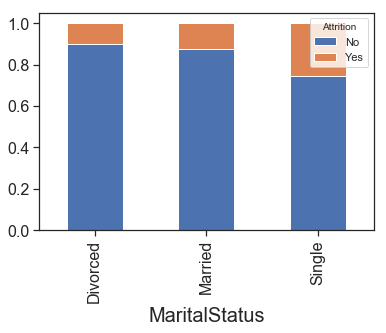

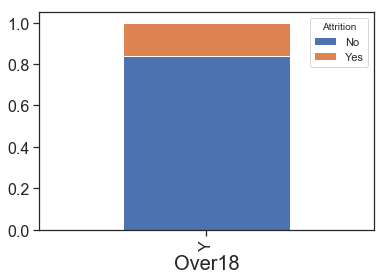

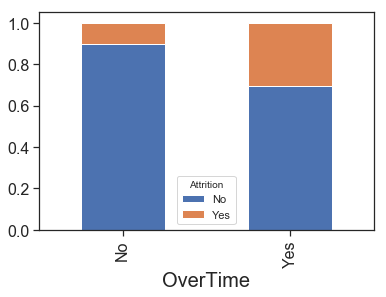

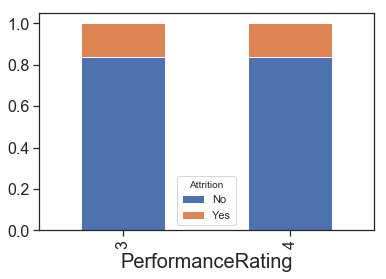

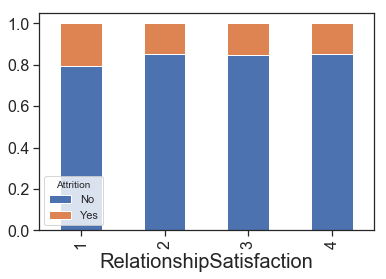

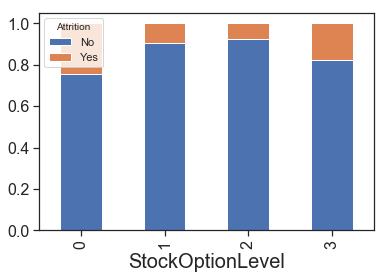

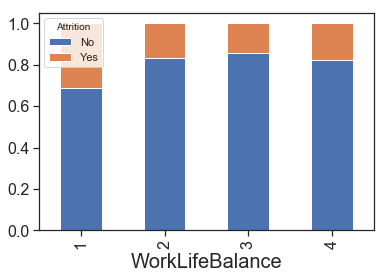

In [325]:
def crosstab(x):
    ax= pd.crosstab(HRattrition[x],HRattrition['Attrition']).apply(lambda r:r/r.sum(),axis=1).plot.bar(stacked=True)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)

for columns in HRattrition.select_dtypes(include=['O','category']).columns[1:]:
    crosstab(columns)

In [326]:
# EFFECT OF LEVEL OF DEPARTMENT AND ATTRITION ON MONTHLY INCOME

# ACROSS ALL LEVELS OF DEPARTMENT , THE AVERAGE MONTHLY INCOME IS HIGHER FOR NOT ATTRITE EMPLOYEES , SALES DEPARTMENT THE AVERAGE INCOME IS ALMOST SAME FOR BOTH THE GROUPS.

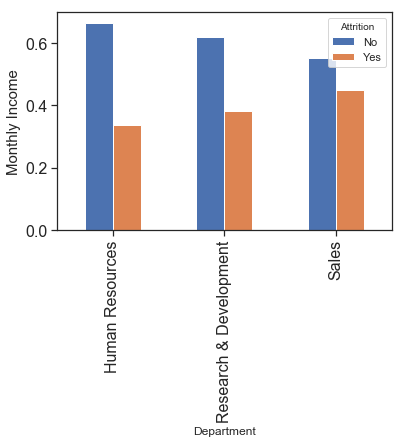

In [327]:
a=pd.crosstab(index=HRattrition['Department'],columns=HRattrition['Attrition'],values=HRattrition['MonthlyIncome'],aggfunc=np.mean).apply(lambda r:r/r.sum(),axis=1).plot(kind='bar')
plt.ylabel('Monthly Income',fontsize=15)
a

In [328]:
# THE AVERAGE INCOME IS HIGHER FOR THOSE WHO DONOT WORK OVER TIME AS WELL WHO DONOT ATTRITE AT THE SAME TIME.

Text(0,0.5,'Monthly Income')

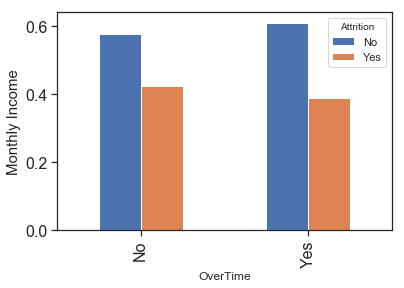

In [329]:
pd.crosstab(index=HRattrition['OverTime'],columns=HRattrition['Attrition'],values=HRattrition['MonthlyIncome'],aggfunc=np.mean).apply(lambda r:r/r.sum(),axis=1).plot(kind='bar')
plt.ylabel('Monthly Income',fontsize=15)

In [330]:
# ITS EVIDENT THAT NO MATTER WHAT THE EDUCATION LEVEL IS , IF THE VAERAGE MONTHLY INCOME IS HIGH PEOPLE WILL NOT ATTRITE.

Text(0,0.5,'Monthly Income')

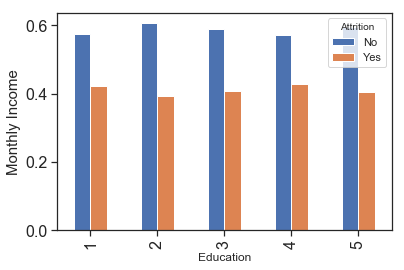

In [331]:
pd.crosstab(index=HRattrition['Education'],columns=HRattrition['Attrition'],values=HRattrition['MonthlyIncome'],aggfunc=np.mean).apply(lambda r:r/r.sum(),axis=1).plot(kind='bar')
plt.ylabel('Monthly Income',fontsize=15)

In [332]:
from scipy.stats import chi2_contingency
label=[]
for values in HRattrition.select_dtypes(include=['O','category']).columns[1:]:
       
        g,p,dof,expected=chi2_contingency(pd.crosstab(HRattrition[values],HRattrition['Attrition']))
        label.append([values,p])
pd.DataFrame(label,columns=['Feature','chisquare_p_value']).sort_values(by='chisquare_p_value')


,Feature,chisquare_p_value
12,OverTime,8.158424e-21
8,JobRole,2.752482e-15
7,JobLevel,6.634685e-15
15,StockOptionLevel,4.379390e-13
10,MaritalStatus,9.455511e-11
6,JobInvolvement,2.863181e-06
0,BusinessTravel,5.608614e-06
4,EnvironmentSatisfaction,5.123469e-05
9,JobSatisfaction,5.563005e-04
16,WorkLifeBalance,9.725699e-04


### By STACKED BAR CHART AND CHISQUARE TESTING , THESE HAVE AN IMPACT ON ATTRITION OF EMPLOYEES

### Distribution across Attrition is imbalanced, majority observations are Y=0

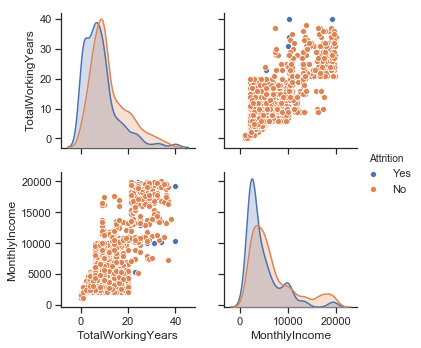

In [333]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(pd.concat([HRattrition[['TotalWorkingYears','MonthlyIncome']],HRattrition['Attrition']],axis=1),hue='Attrition')

### NO MISSING DATA 

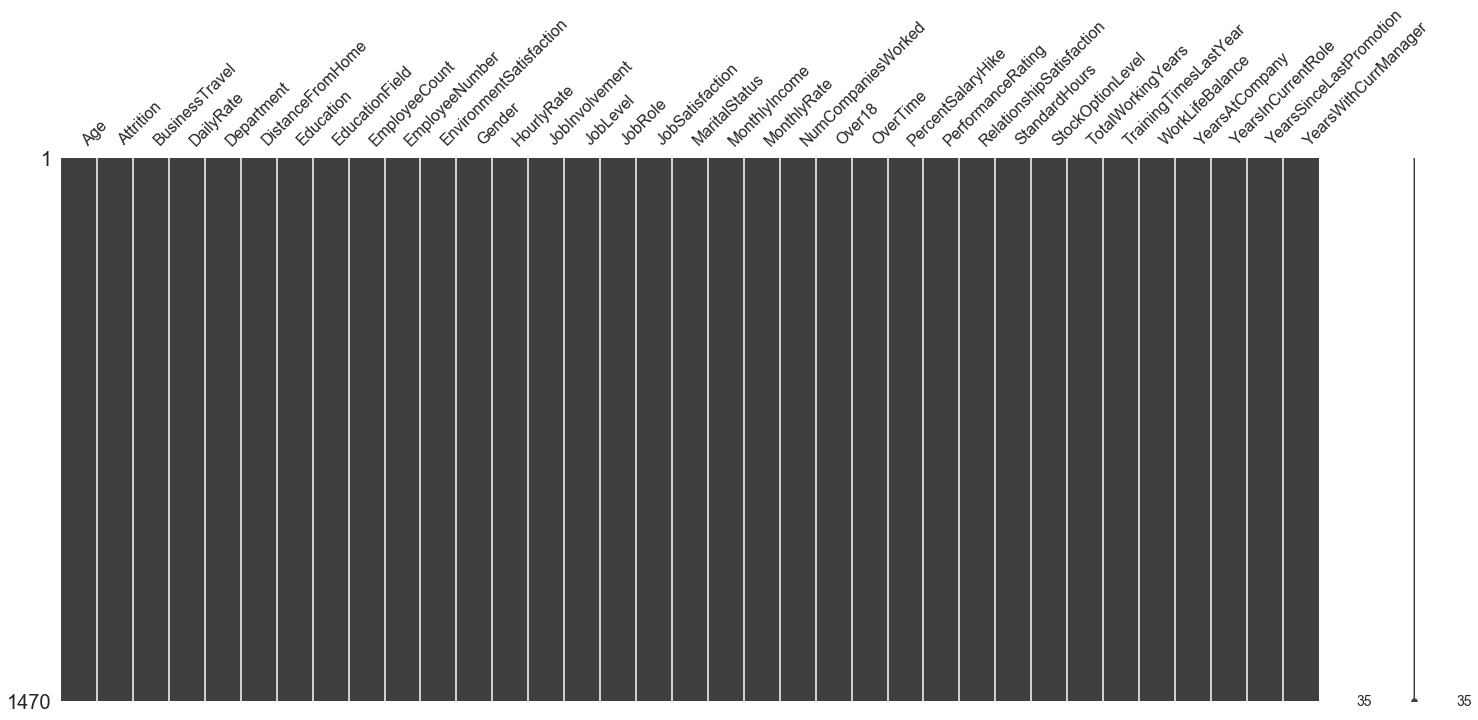

In [334]:
msno.matrix(HRattrition)

## HANDLING OUTLIERS

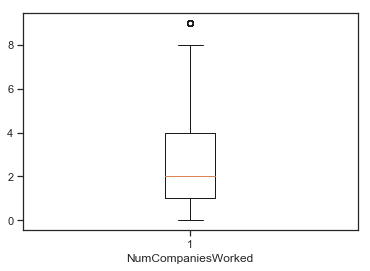

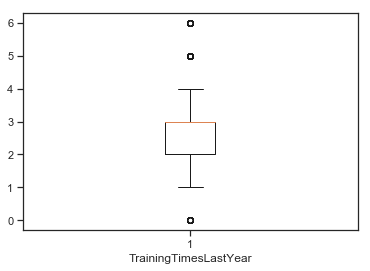

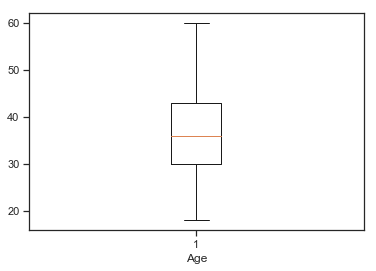

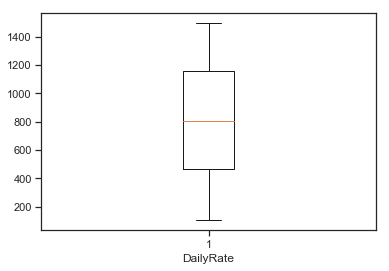

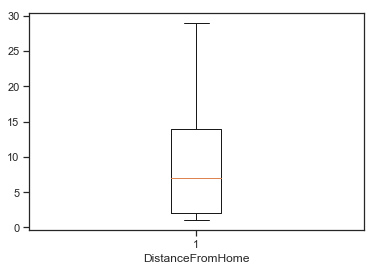

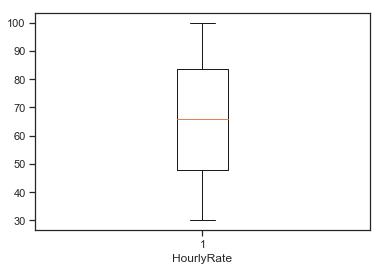

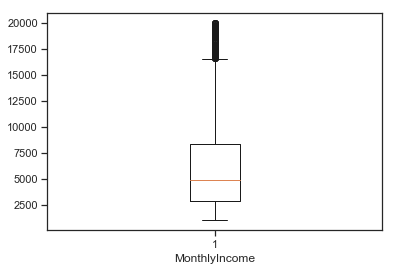

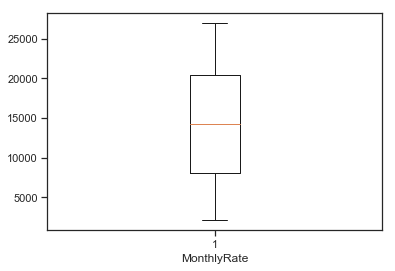

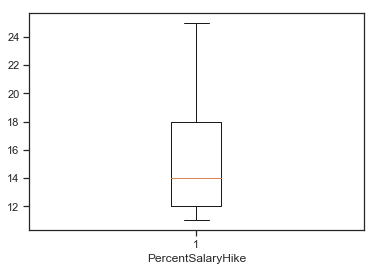

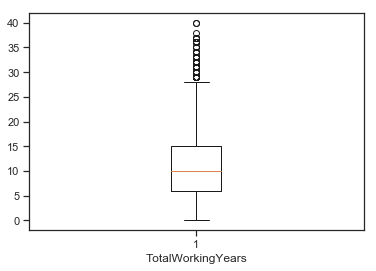

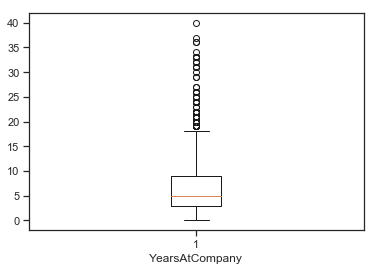

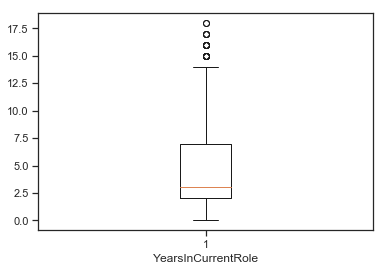

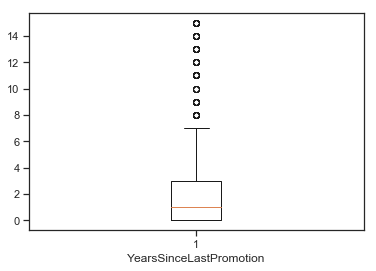

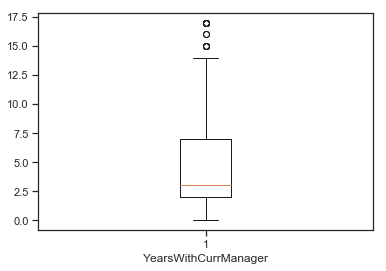

In [335]:
def outliers(x):

    #x=HRattrition.columns[1]
    
    ax=plt.boxplot(HRattrition[x])
    plt.xlabel(x)
    plt.show()
    
    
    return ax
    
    
    #ax.annotate(percentage)
#total=len(HRattrition[x])
#for p in ax.patches:
    #percentage='{:.1f}%'.format(100*p.get_width()/total)
    #ax.annotate(percentage)
#plt.show()
    
   
    

for columns in numericvariables:
    outliers(columns)

In [336]:
# ONE WAY TO COUNTER THIS PROBLEM IS BY SCALING THE VARIABLES SO AS TO REDUCE ITS EFFECT ON THE MODEL.
# use of StandardScaler() to do scaling tranformation on numerical variables

In [337]:
#Handling Outliers - Method2
def outlier_capping(x):
    #x = x.clip_upper(x.quantile(0.99))
    #x = x.clip_lower(x.quantile(0.01))
    x = x.clip(lower = x.quantile(0.01), upper=x.quantile(0.99))
    return x

X_num=HRattrition[numericvariables]
Y=HRattrition['Attrition']
Datatransformed_numerical=X_num.apply(outlier_capping)


# FEATURE ENGINEERING

In [338]:
HRattrition['AboveAverageIncome_HR']=HRattrition.apply(lambda x:'1' if (x['Department']=='Human Resources' )&(x['MonthlyIncome']>HRattrition.groupby(['Department'])[['MonthlyIncome']].mean().loc['Human Resources',:][0]) &(x['PercentSalaryHike']>15) else '0',axis=1)
HRattrition['AboveAverageIncome_RnD']=HRattrition.apply(lambda x:'1' if (x['Department']=='Research & Development' ) & (x['MonthlyIncome']>HRattrition.groupby(['Department'])[['MonthlyIncome']].mean().loc['Research & Development',:][0])&(x['PercentSalaryHike']>15) else 0,axis=1)    
HRattrition['AboveAverageIncome_Sales']=HRattrition.apply(lambda x:'1' if (x['Department']=='Sales' ) & (x['MonthlyIncome']>HRattrition.groupby(['Department'])[['MonthlyIncome']].mean().loc['Sales',:][0])&(x['PercentSalaryHike']>15)  else 0,axis=1) 

In [339]:
HRattrition['progressreport']=HRattrition.apply(lambda x:'Slowprogess' if (x['YearsInCurrentRole']>5 )| (x['YearsSinceLastPromotion']>10) else 'progress',axis=1) 

In [340]:
HRattrition['AboveAverageIncome_HR']=HRattrition['AboveAverageIncome_HR'].astype('O')
HRattrition['AboveAverageIncome_RnD']=HRattrition['AboveAverageIncome_RnD'].astype('O')
HRattrition['AboveAverageIncome_Sales']=HRattrition['AboveAverageIncome_Sales'].astype('O')

In [341]:
def chisquare(values):      
        g,p,dof,expected=chi2_contingency(pd.crosstab(HRattrition[values],HRattrition['Attrition']))
        return {values,p}

for i in ['progressreport','AboveAverageIncome_HR','AboveAverageIncome_RnD','AboveAverageIncome_Sales']:
    print(chisquare(i))

{1.1876412002113335e-05, 'progressreport'}
{0.7092105555171455, 'AboveAverageIncome_HR'}
{'AboveAverageIncome_RnD', 3.610699068269629e-05}
{0.13239658675007487, 'AboveAverageIncome_Sales'}


In [342]:
HRattrition.select_dtypes('O').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime',
       'AboveAverageIncome_HR', 'AboveAverageIncome_RnD',
       'AboveAverageIncome_Sales', 'progressreport'],
      dtype='object')

## CONVERSION OF CATEGORICAL TO NUMERICAL

In [343]:
HRATTRITION=pd.get_dummies(pd.concat([HRattrition[HRattrition.select_dtypes('O').columns[:]],Datatransformed_numerical],axis=1),drop_first=True)

#HRATTRITION=pd.get_dummies(HRattrition,drop_first=True)

## ADD CATEGORICAL VARIABLES TO HRATTRITION

In [344]:
HRATTRITION=pd.concat([HRATTRITION,HRattrition.select_dtypes('category')],axis=1)

In [345]:
columns=[element.replace(' ','_').replace('&','') for element in HRATTRITION.columns]
HRATTRITION.columns=columns

# Feature Selection

In [346]:
HRATTRITION.columns.difference(['JobLevel'])

Index(['AboveAverageIncome_HR_1', 'AboveAverageIncome_RnD_1',
       'AboveAverageIncome_Sales_1', 'Age', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'DailyRate', 'Department_Research__Development', 'Department_Sales',
       'DistanceFromHome', 'Education', 'EducationField_Life_Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical_Degree',
       'EnvironmentSatisfaction', 'Gender_Male', 'HourlyRate',
       'JobInvolvement', 'JobRole_Human_Resources',
       'JobRole_Laboratory_Technician', 'JobRole_Manager',
       'JobRole_Manufacturing_Director', 'JobRole_Research_Director',
       'JobRole_Research_Scientist', 'JobRole_Sales_Executive',
       'JobRole_Sales_Representative', 'JobSatisfaction',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime_Yes',
       'PercentSalaryHike', 

In [347]:
HRATTRITION.dtypes

NumCompaniesWorked                     int64
TrainingTimesLastYear                  int64
Age                                  float64
DailyRate                            float64
DistanceFromHome                     float64
HourlyRate                           float64
MonthlyIncome                        float64
MonthlyRate                          float64
PercentSalaryHike                    float64
TotalWorkingYears                    float64
YearsAtCompany                       float64
YearsInCurrentRole                   float64
YearsSinceLastPromotion              float64
YearsWithCurrManager                 float64
Attrition_Yes                          uint8
BusinessTravel_Travel_Frequently       uint8
BusinessTravel_Travel_Rarely           uint8
Department_Research__Development       uint8
Department_Sales                       uint8
EducationField_Life_Sciences           uint8
EducationField_Marketing               uint8
EducationField_Medical                 uint8
EducationF

### chisquare testing to test whether a categorical variable has a relationship with Attrition or not


In [348]:
list1=[]
for x in HRATTRITION.select_dtypes(include=['uint8','category']).columns[1:]:
        g,p,dof,expected=chi2_contingency(pd.crosstab(index=HRATTRITION[x],columns=HRATTRITION['Attrition_Yes']))
        list1.append([x,p])
chisquaretable=pd.DataFrame(list1,columns=['variables','chi_p']).sort_values(by='chi_p')      

### t test on whether there is significant effect of Attrition on dependent/numerical variable
### OR
### if the two groups are different based on dependent variables

In [349]:
from scipy.stats import ttest_ind
def ttest_(x):
        g,p=ttest_ind(HRATTRITION.loc[HRATTRITION['Attrition_Yes']==1,x],HRATTRITION.loc[HRATTRITION['Attrition_Yes']==0,x])
        return {'variables':x,'p_value':p}

In [350]:
list1=[]
for columns in HRATTRITION.select_dtypes('float64').columns:
    g,p=ttest_ind(HRATTRITION.loc[HRATTRITION['Attrition_Yes']==1,columns],HRATTRITION.loc[HRATTRITION['Attrition_Yes']==0,columns])
    list1.append({'variables':columns,'p_value':p})

In [351]:
anova=pd.DataFrame(list1).sort_values(by='p_value')

In [352]:
# remove PerformanceRating,HourlyRate,PercentSalaryHike,MonthlyRate,Education,YearsSinceLastPromotion,NumCompaniesWorked,RelationshipSatisfaction

In [353]:
# RFE (Recursive feature selection ) using randomforestregressor


In [354]:
from sklearn.feature_selection import RFE
import statsmodels.formula.api as smf
from sklearn import metrics

In [355]:
lst3=[]
for feature in HRATTRITION.columns.difference(['Attrition_Yes']):
    model=smf.logit('Attrition_Yes~'+str(feature),data=HRATTRITION).fit()
    auc=metrics.roc_auc_score(HRATTRITION.Attrition_Yes,model.predict(HRATTRITION[feature]))
    lst3.append({'variables':feature,'auc_score':auc})
Variableselection=pd.DataFrame(lst3)

         Current function value: 0.441096
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.432920
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.440822
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.428338
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.435639
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440092
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.438156
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.438541
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.438776
         Iterations 6
Optimization ter

C:\Users\riasa\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.434696
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441258
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441671
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.432963
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.416715
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.441099
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.437256
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.437222
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.437554
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.436033
  

In [356]:
DATACOMBINEDSIGNIFICANCE=pd.merge(Variableselection,anova,on='variables',how='left').merge(chisquaretable,on='variables',how='left').sort_values(by='auc_score',ascending=False).round(4).fillna('-')




In [357]:
DATACOMBINEDSIGNIFICANCE

,auc_score,variables,p_value,chi_p
20,0.6619,JobLevel,-,0
40,0.6560,TotalWorkingYears,0,-
32,0.6557,MonthlyIncome,0,-
35,0.6507,OverTime_Yes,-,0
43,0.6490,YearsAtCompany,0,-
39,0.6438,StockOptionLevel,-,0
44,0.6399,YearsInCurrentRole,0,-
46,0.6360,YearsWithCurrManager,0,-
3,0.6343,Age,0,-
31,0.6112,MaritalStatus_Single,-,0


In [358]:
DATACOMBINEDSIGNIFICANCE['variables'].values

array(['JobLevel', 'TotalWorkingYears', 'MonthlyIncome', 'OverTime_Yes',
       'YearsAtCompany', 'StockOptionLevel', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'Age', 'MaritalStatus_Single',
       'JobInvolvement', 'JobSatisfaction', 'progressreport_progress',
       'EnvironmentSatisfaction', 'DistanceFromHome',
       'MaritalStatus_Married', 'BusinessTravel_Travel_Frequently',
       'Department_Research__Development', 'WorkLifeBalance',
       'JobRole_Laboratory_Technician', 'Department_Sales',
       'JobRole_Sales_Representative', 'DailyRate',
       'AboveAverageIncome_RnD_1', 'YearsSinceLastPromotion',
       'TrainingTimesLastYear', 'RelationshipSatisfaction',
       'JobRole_Manufacturing_Director', 'Education',
       'BusinessTravel_Travel_Rarely', 'EducationField_Medical',
       'JobRole_Manager', 'JobRole_Research_Director',
       'EducationField_Technical_Degree', 'EducationField_Marketing',
       'NumCompaniesWorked', 'EducationField_Life_Sciences',
    

In [359]:
IMP_VARIABLES_3METHODS=['JobLevel', 'TotalWorkingYears', 'MonthlyIncome', 'OverTime_Yes',
       'YearsAtCompany', 'StockOptionLevel', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'Age', 'MaritalStatus_Single']+['DistanceFromHome']+['JobSatisfaction','progressreport_progress','EnvironmentSatisfaction','MaritalStatus_Married','BusinessTravel_Travel_Frequently','Department_Research__Development','WorkLifeBalance','JobRole_Laboratory_Technician','JobRole_Sales_Representative','Department_Sales','AboveAverageIncome_RnD_1','JobInvolvement']
X=HRATTRITION[IMP_VARIABLES_3METHODS]

In [360]:
len(IMP_VARIABLES_3METHODS)

23

In [361]:
# These variables are significant withrespectto both amalgation of above 3 methods:chisquare,t test, individual roc

In [362]:
# X=HRATTRITION[['JobLevel', 'TotalWorkingYears', 'MonthlyIncome', 'OverTime_Yes',
#        'YearsAtCompany', 'StockOptionLevel', 'YearsInCurrentRole',
#        'YearsWithCurrManager', 'Age', 'MaritalStatus_Single',
#        'JobInvolvement', 'JobSatisfaction', 'progressreport_progress',
#        'EnvironmentSatisfaction', 'DistanceFromHome',
#        'MaritalStatus_Married', 'BusinessTravel_Travel_Frequently',
#        'Department_Research__Development', 'WorkLifeBalance',
#        'JobRole_Laboratory_Technician', 'Department_Sales',
#        'JobRole_Sales_Representative', 'DailyRate',
#        'AboveAverageIncome_RnD_1','JobRole_Manufacturing_Director','JobRole_Manager','JobRole_Research_Director','EducationField_Technical_Degree']]
Y=HRATTRITION['Attrition_Yes']
len(X.columns)

23

In [363]:
X.columns

Index(['JobLevel', 'TotalWorkingYears', 'MonthlyIncome', 'OverTime_Yes',
       'YearsAtCompany', 'StockOptionLevel', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'Age', 'MaritalStatus_Single',
       'DistanceFromHome', 'JobSatisfaction', 'progressreport_progress',
       'EnvironmentSatisfaction', 'MaritalStatus_Married',
       'BusinessTravel_Travel_Frequently', 'Department_Research__Development',
       'WorkLifeBalance', 'JobRole_Laboratory_Technician',
       'JobRole_Sales_Representative', 'Department_Sales',
       'AboveAverageIncome_RnD_1', 'JobInvolvement'],
      dtype='object')

In [364]:
X[['JobLevel', 'StockOptionLevel','JobInvolvement','EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']]=X[['JobLevel', 'StockOptionLevel', 'JobInvolvement',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].astype('float64')

C:\Users\riasa\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [528]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Final_list=list(X.columns.difference(['Attrition_yes','JobLevel','Age','Department_Research__Development','JobInvolvement','WorkLifeBalance','YearsAtCompany']))

X_new=X[Final_list]
vif=pd.DataFrame()
vif['feature']=Final_list
vif['vif']=[variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]

In [529]:
vif

,feature,vif
0,AboveAverageIncome_RnD_1,1.317553
1,BusinessTravel_Travel_Frequently,1.235974
2,Department_Sales,1.970318
3,DistanceFromHome,2.252278
4,EnvironmentSatisfaction,6.314879
5,JobRole_Laboratory_Technician,1.474346
6,JobRole_Sales_Representative,1.344699
7,JobSatisfaction,6.386599
8,MaritalStatus_Married,3.061353
9,MaritalStatus_Single,3.796071


In [530]:
vif.shape

(17, 2)

# FITTING FOR LOGISTIC REGRESSION

In [532]:
data_final = pd.concat([X_new, HRATTRITION['Attrition_Yes']], axis=1)

In [533]:
#split the data into train & test
train, test = train_test_split(data_final, test_size=0.3, random_state=123)

In [534]:
train.head()

,AboveAverageIncome_RnD_1,BusinessTravel_Travel_Frequently,Department_Sales,DistanceFromHome,EnvironmentSatisfaction,JobRole_Laboratory_Technician,JobRole_Sales_Representative,JobSatisfaction,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome,OverTime_Yes,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,progressreport_progress,Attrition_Yes
553,0,0,0,2.0,4.0,0,0,4.0,0,1,2342.0,1,0.0,5.0,2.0,3.0,1,0
758,0,0,1,1.0,2.0,0,0,4.0,1,0,11904.0,1,1.0,14.0,4.0,4.0,1,0
491,0,1,0,9.0,4.0,1,0,3.0,0,0,5679.0,1,1.0,10.0,7.0,7.0,0,0
376,0,0,1,14.0,3.0,0,0,4.0,1,0,4936.0,0,1.0,18.0,7.0,7.0,0,0
250,0,1,0,10.0,1.0,0,0,3.0,0,0,10048.0,0,2.0,17.0,0.0,0.0,1,1


In [535]:
train['Attrition_Yes'].value_counts()/train.shape[0]

0    0.825073
1    0.174927
Name: Attrition_Yes, dtype: float64

In [536]:
train.columns

Index(['AboveAverageIncome_RnD_1', 'BusinessTravel_Travel_Frequently',
       'Department_Sales', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobRole_Laboratory_Technician', 'JobRole_Sales_Representative',
       'JobSatisfaction', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'MonthlyIncome', 'OverTime_Yes', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'progressreport_progress', 'Attrition_Yes'],
      dtype='object')

In [537]:
#Univariate Regression
model1 = smf.logit('Attrition_Yes ~'+ '+'. join(train.columns.difference(['Attrition_Yes','MaritalStatus_Married','MonthlyIncome','StockOptionLevel','YearsWithCurrManager','Department_Sales','AboveAverageIncome_RnD_1'])),data=train).fit()

Optimization terminated successfully.
         Current function value: 0.369103
         Iterations 7


In [538]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1017
Method:                           MLE   Df Model:                           11
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.2039
Time:                        02:47:41   Log-Likelihood:                -379.81
converged:                       True   LL-Null:                       -477.06
                                        LLR p-value:                 1.026e-35
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.7612      0.655      1.162      0.245      -0.523       2.045
BusinessTravel_Travel_Frequently     0.6702      0.216      3.098

In [539]:
import pickle
with open('model_loan.pkl','wb') as f:
    pickle.dump(model1,f)
with open('model_loan.pkl','rb') as f:
    model1=pickle.load(f)

In [540]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1017
Method:                           MLE   Df Model:                           11
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.2039
Time:                        02:47:42   Log-Likelihood:                -379.81
converged:                       True   LL-Null:                       -477.06
                                        LLR p-value:                 1.026e-35
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.7612      0.655      1.162      0.245      -0.523       2.045
BusinessTravel_Travel_Frequently     0.6702      0.216      3.098      0.002       0.246       1.094
DistanceFromHome                     0.0315      0.011      2.763      0.006       0.009       0.054
EnvironmentSatisfaction             -0.3816      0.084     -4.540      0.000      -0.546      -0.217
JobRole_Laboratory_Technician        0.7075      0.223      3.168      0.002       0.270       1.145
JobRole_Sales_Representative         1.1942      0.336      3.558      0.000       0.536       1.852
JobSatisfaction                     -0.3351      0.083     -4.034      0.000      -0.498      -0.172
MaritalStatus_Single                 0.9036      0.190      4.753      0.000       0.531       1.276
OverTime_Yes                         1.4783      0.192      7.686      0.000       1.101       1.855
TotalWorkingYears                   -0.0535      0.017     -3.093      0.002      -0.087      -0.020
YearsInCurrentRole                  -0.2041      0.065     -3.117      0.002      -0.332      -0.076
progressreport_progress             -1.1078      0.434     -2.553      0.011      -1.958      -0.257
====================================================================================================
"""

In [541]:
model1.conf_int()

,0,1
Intercept,-0.522939,2.045417
BusinessTravel_Travel_Frequently,0.246188,1.094162
DistanceFromHome,0.009153,0.053836
EnvironmentSatisfaction,-0.546403,-0.216867
JobRole_Laboratory_Technician,0.269770,1.145287
JobRole_Sales_Representative,0.536332,1.852067
JobSatisfaction,-0.497941,-0.172282
MaritalStatus_Single,0.530993,1.276134
OverTime_Yes,1.101366,1.855295
TotalWorkingYears,-0.087381,-0.019600


In [542]:
VARIABLES=train.columns.difference(['MaritalStatus_Married','MonthlyIncome','StockOptionLevel','YearsWithCurrManager','Department_Sales','AboveAverageIncome_RnD_1'])
test=test[VARIABLES]
train=train[VARIABLES]

In [543]:
(np.exp(model1.params)-1)*100

Intercept                           114.092740
BusinessTravel_Travel_Frequently     95.457927
DistanceFromHome                      3.199574
EnvironmentSatisfaction             -31.725604
JobRole_Laboratory_Technician       102.897082
JobRole_Sales_Representative        230.091345
JobSatisfaction                     -28.474153
MaritalStatus_Single                146.838363
OverTime_Yes                        338.561746
TotalWorkingYears                    -5.208531
YearsInCurrentRole                  -18.460281
progressreport_progress             -66.973050
dtype: float64

In [544]:
test.columns

Index(['Attrition_Yes', 'BusinessTravel_Travel_Frequently', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobRole_Laboratory_Technician',
       'JobRole_Sales_Representative', 'JobSatisfaction',
       'MaritalStatus_Single', 'OverTime_Yes', 'TotalWorkingYears',
       'YearsInCurrentRole', 'progressreport_progress'],
      dtype='object')

### PREDICTED PROBABILITIES 

In [545]:
train['predprob']=model1.predict()

In [546]:
test['predprob']=model1.predict(test)

### ROC_AUC : THE PREDICTED PROBABILITIES ARE MORE OR LESS HIGHER CORRESPONDING TO Y=1 AND LESS FOR Y=0
### THE PERFORMANCE OF THE MODEL IS GOOD AS THE ROC_AUC IS MORE OR LESS SAME

In [547]:
metrics.roc_auc_score(train.Attrition_Yes, model1.predict())

0.7984982332155475

In [548]:
metrics.roc_auc_score(test.Attrition_Yes, model1.predict(test))

0.8485014619883041

In [549]:
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(LogisticRegression(),train[list(VARIABLES.difference(['Attrition_Yes']))],train['Attrition_Yes'],cv=10,scoring='roc_auc')

C:\Users\riasa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\riasa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [550]:
np.mean(val_score),np.std(val_score),np.mean(val_score)-np.std(val_score),np.mean(val_score)+np.std(val_score)

(0.7853501400560223,
 0.05176584521444142,
 0.7335842948415809,
 0.8371159852704637)

In [551]:
VARIABLES.difference(['Attrition_Yes'])

Index(['BusinessTravel_Travel_Frequently', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobRole_Laboratory_Technician',
       'JobRole_Sales_Representative', 'JobSatisfaction',
       'MaritalStatus_Single', 'OverTime_Yes', 'TotalWorkingYears',
       'YearsInCurrentRole', 'progressreport_progress'],
      dtype='object')

In [552]:
# HOW GOOD IS THE PREDICTION

RANDOMLY PICK ONE OBSERVATION CORRESPONDING TO Y=1 AND MATCH WITH THE OBSERVATION CORRESPONDING TO Y=0
SINCE WE HAVE HIGH PREDICTED PROBABILITIES FOR Y=1 AND LOW FOF Y=0 SIGNIFIES GOOD MODEL


In [553]:
pd.concat([test['predprob'],test['Attrition_Yes']],axis=1).head(10)

,predprob,Attrition_Yes
42,0.648257,1
76,0.035826,0
1380,0.140484,0
252,0.057469,0
388,0.176237,0
1206,0.111334,0
547,0.369924,1
35,0.023007,0
31,0.090307,0
320,0.179849,0


In [554]:
lst4=[]
for threshold in np.linspace(0,1,100):
    train['event']=np.where(train['predprob']>threshold,1,0)
    TP=np.where((train.Attrition_Yes==1)&(train.event==1),1,0)
    TN=np.where((train.Attrition_Yes==0)&(train.event==0),1,0)
    FP=np.where((train.Attrition_Yes==0)&(train.event==1),1,0)
    FN=np.where((train.Attrition_Yes==1)&(train.event==0),1,0)
    Sensitivity=TP.sum()/(TP.sum()+FN.sum())
    Specificity=TN.sum()/(TN.sum()+FP.sum())
    FPR=1-Specificity
    Total = Sensitivity+Specificity
    lst4.append({'cutoff':threshold, 'sens':Sensitivity,'spec':Specificity,'fpr':FPR,'total':Total})
    

In [555]:
optimalcutoff=pd.DataFrame(lst4)

In [556]:
optimalcutoff

,cutoff,fpr,sens,spec,total
0,0.000000,1.000000,1.000000,0.000000,1.000000
1,0.010101,0.968198,0.983333,0.031802,1.015135
2,0.020202,0.916372,0.972222,0.083628,1.055850
3,0.030303,0.837456,0.961111,0.162544,1.123655
4,0.040404,0.783274,0.950000,0.216726,1.166726
5,0.050505,0.716137,0.944444,0.283863,1.228308
6,0.060606,0.663133,0.900000,0.336867,1.236867
7,0.070707,0.606596,0.883333,0.393404,1.276737
8,0.080808,0.568905,0.861111,0.431095,1.292207
9,0.090909,0.521790,0.855556,0.478210,1.333765


In [557]:
optimalcutoff.sort_values(by='total',ascending=False).iloc[0]

cutoff    0.212121
fpr       0.193168
sens      0.700000
spec      0.806832
total     1.506832
Name: 21, dtype: float64

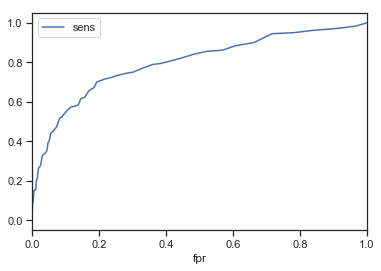

In [558]:
optimalcutoff.plot(x='fpr',y='sens',kind='line')

In [559]:
train['pred'] = np.where(train.predprob >0.212121,1, 0)
test['pred'] = np.where(test.predprob >0.212121,1, 0)

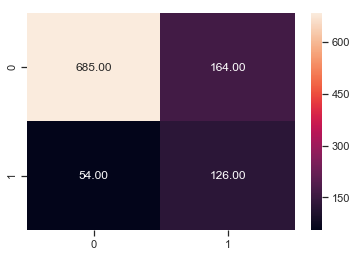

In [560]:
#Train
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(train.Attrition_Yes, train.pred),annot=True,fmt='.2f')

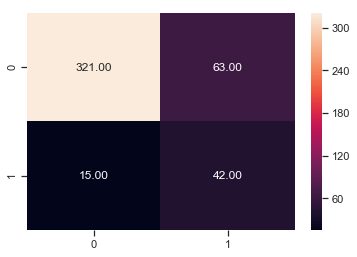

In [561]:
#Test
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(test.Attrition_Yes, test.pred),annot=True,fmt='.2f')

In [562]:
print(metrics.classification_report(train.Attrition_Yes, train.pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       849
           1       0.43      0.70      0.54       180

    accuracy                           0.79      1029
   macro avg       0.68      0.75      0.70      1029
weighted avg       0.84      0.79      0.81      1029



In [563]:
print(metrics.classification_report(test.Attrition_Yes, test.pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       384
           1       0.40      0.74      0.52        57

    accuracy                           0.82       441
   macro avg       0.68      0.79      0.71       441
weighted avg       0.88      0.82      0.84       441



In [564]:
data=pd.concat([train,test]).reset_index().drop(columns='index')

C:\Users\riasa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [565]:
data.drop(columns='event',inplace=True)

In [566]:
Xvar=data[list(data.columns.difference(['Attrition_Yes','predprob','pred']))]
Yvar=data['Attrition_Yes']
Xvar.columns

Index(['BusinessTravel_Travel_Frequently', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobRole_Laboratory_Technician',
       'JobRole_Sales_Representative', 'JobSatisfaction',
       'MaritalStatus_Single', 'OverTime_Yes', 'TotalWorkingYears',
       'YearsInCurrentRole', 'progressreport_progress'],
      dtype='object')

## SMOTE : CREATING SYNTHETIC OR NEW POINTS RELATED TO EXISTING MINORITY DATA POINTS

In [567]:
# define pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
oversample = SMOTE(random_state=1)


In [568]:
Xvar,Yvar=oversample.fit_resample(X_new, Y)

In [569]:
 X_train, X_test, y_train, y_test = train_test_split(Xvar, Yvar, test_size=0.3, random_state=123)

In [570]:
Xvar.shape

(2466, 17)

In [571]:
#X,Y=oversample.fit_resample(X_train, y_train)

In [572]:
#X_, y_ = oversample.fit_resample(X_test, y_test)

In [573]:
# summarize the new class distribution
from collections import Counter
counter = Counter(y_train)
print(counter)


Counter({0: 886, 1: 840})


In [574]:
from collections import Counter
counter = Counter(y_test)
print(counter)


Counter({1: 393, 0: 347})


In [575]:
train=pd.concat([X_train,y_train],axis=1)
test=pd.concat([X_test,y_test],axis=1)
train.columns

Index(['AboveAverageIncome_RnD_1', 'BusinessTravel_Travel_Frequently',
       'Department_Sales', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobRole_Laboratory_Technician', 'JobRole_Sales_Representative',
       'JobSatisfaction', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'MonthlyIncome', 'OverTime_Yes', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'progressreport_progress', 'Attrition_Yes'],
      dtype='object')

In [576]:
train.corr().loc[:,'Attrition_Yes']

AboveAverageIncome_RnD_1           -0.199621
BusinessTravel_Travel_Frequently   -0.042575
Department_Sales                   -0.091403
DistanceFromHome                    0.094562
EnvironmentSatisfaction            -0.170199
JobRole_Laboratory_Technician      -0.035138
JobRole_Sales_Representative        0.016905
JobSatisfaction                    -0.191605
MaritalStatus_Married              -0.316012
MaritalStatus_Single                0.030972
MonthlyIncome                      -0.244499
OverTime_Yes                        0.092559
StockOptionLevel                   -0.208839
TotalWorkingYears                  -0.263458
YearsInCurrentRole                 -0.233947
YearsWithCurrManager               -0.240137
progressreport_progress             0.088042
Attrition_Yes                       1.000000
Name: Attrition_Yes, dtype: float64

In [577]:
#Univariate Regression
model2 = smf.logit('Attrition_Yes ~'+ '+'. join(train.columns.difference(['Attrition_Yes',"BusinessTravel_Travel_Frequently",'Department_Sales','JobRole_Sales_Representative','MonthlyIncome'])),data=train).fit()

Optimization terminated successfully.
         Current function value: 0.496336
         Iterations 8


In [578]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1726
Model:                          Logit   Df Residuals:                     1712
Method:                           MLE   Df Model:                           13
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.2836
Time:                        02:47:59   Log-Likelihood:                -856.68
converged:                       True   LL-Null:                       -1195.8
                                        LLR p-value:                1.594e-136
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.2882      0.442     14.235      0.000       5.422       7.154
AboveAverageIncome_RnD_1         -2.9478      0.622     -4.739      0.000      -4.167      -1.729
DistanceFromHome                  0.0350      0.008      4.425      0.000       0.020       0.051
EnvironmentSatisfaction          -0.3577      0.058     -6.125      0.000      -0.472      -0.243
JobRole_Laboratory_Technician    -0.4174      0.165     -2.530      0.011      -0.741      -0.094
JobSatisfaction                  -0.3741      0.057     -6.535      0.000      -0.486      -0.262
MaritalStatus_Married            -1.6892      0.149    -11.302      0.000      -1.982      -1.396
MaritalStatus_Single             -1.5052      0.182     -8.279      0.000      -1.862      -1.149
OverTime_Yes                      0.6877      0.134      5.129      0.000       0.425       0.950
StockOptionLevel                 -0.8104      0.098     -8.250      0.000      -1.003      -0.618
TotalWorkingYears                -0.0639      0.011     -5.699      0.000      -0.086      -0.042
YearsInCurrentRole               -0.2243      0.042     -5.308      0.000      -0.307      -0.141
YearsWithCurrManager             -0.1285      0.030     -4.339      0.000      -0.187      -0.070
progressreport_progress          -2.0433      0.264     -7.746      0.000      -2.560      -1.526
=================================================================================================
"""

In [110]:
# save the model to disk
filename = 'finalized_modelSMOTE.sav'
pickle.dump(model2, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
model2 = pickle.load(open(filename, 'rb'))


In [111]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1726
Model:                          Logit   Df Residuals:                     1712
Method:                           MLE   Df Model:                           13
Date:                Wed, 12 May 2021   Pseudo R-squ.:                  0.2944
Time:                        20:08:32   Log-Likelihood:                -843.71
converged:                       True   LL-Null:                       -1195.8
                                        LLR p-value:                4.594e-142
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.3912      0.437     14.626      0.000       5.535       7.248
AboveAverageIncome_RnD_1         -2.9793      0.621     -4.794      0.000      -4.197      -1.761
DistanceFromHome                  0.0314      0.008      3.936      0.000       0.016       0.047
EnvironmentSatisfaction          -0.3573      0.058     -6.127      0.000      -0.472      -0.243
JobRole_Laboratory_Technician    -0.5659      0.172     -3.285      0.001      -0.904      -0.228
JobSatisfaction                  -0.4002      0.059     -6.807      0.000      -0.515      -0.285
MaritalStatus_Married            -1.7537      0.152    -11.569      0.000      -2.051      -1.457
MaritalStatus_Single             -1.3457      0.180     -7.471      0.000      -1.699      -0.993
OverTime_Yes                      0.7851      0.134      5.859      0.000       0.523       1.048
StockOptionLevel                 -0.7846      0.098     -7.986      0.000      -0.977      -0.592
TotalWorkingYears                -0.0610      0.011     -5.483      0.000      -0.083      -0.039
YearsInCurrentRole               -0.2284      0.042     -5.454      0.000      -0.310      -0.146
YearsWithCurrManager             -0.1311      0.030     -4.399      0.000      -0.190      -0.073
progressreport_progress          -2.1729      0.257     -8.463      0.000      -2.676      -1.670
=================================================================================================
"""

In [112]:
train=train[train.columns.difference(["BusinessTravel_Travel_Frequently",'Department_Sales','JobRole_Sales_Representative','MonthlyIncome'])]
test=test[test.columns.difference(["BusinessTravel_Travel_Frequently",'Department_Sales','JobRole_Sales_Representative','MonthlyIncome'])]

In [113]:
len(model2.predict())

1726

In [114]:
(np.exp(model2.params)-1)*100

Intercept                        59556.488717
AboveAverageIncome_RnD_1           -94.917130
DistanceFromHome                     3.189302
EnvironmentSatisfaction            -30.045674
JobRole_Laboratory_Technician      -43.216432
JobSatisfaction                    -32.983228
MaritalStatus_Married              -82.686729
MaritalStatus_Single               -73.965388
OverTime_Yes                       119.269644
StockOptionLevel                   -54.368219
TotalWorkingYears                   -5.920952
YearsInCurrentRole                 -20.417304
YearsWithCurrManager               -12.290336
progressreport_progress            -88.614982
dtype: float64

In [115]:
train.Attrition_Yes

559     0
1531    1
2105    1
348     0
2456    1
1335    0
483     0
1636    1
1319    0
2170    1
104     0
860     1
710     0
2190    1
1523    1
2156    1
804     0
278     0
119     0
846     0
628     0
925     0
1430    0
29      0
1588    1
1713    1
94      0
1800    1
1987    1
2166    1
       ..
1382    0
2428    1
99      0
1897    1
1159    0
1981    1
1583    1
2465    1
39      0
2388    1
2050    1
451     0
1847    1
1092    0
1363    0
111     1
2272    1
942     0
1568    1
73      0
47      0
2161    1
96      0
1761    1
1593    1
1147    0
2154    1
1766    1
1122    0
1346    0
Name: Attrition_Yes, Length: 1726, dtype: uint8

In [116]:
test.columns

Index(['AboveAverageIncome_RnD_1', 'Attrition_Yes', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobRole_Laboratory_Technician',
       'JobSatisfaction', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'OverTime_Yes', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsInCurrentRole', 'YearsWithCurrManager',
       'progressreport_progress'],
      dtype='object')

In [117]:
train['pred_lab']=np.where(model2.predict()>0.5,1,0)

### can rely on both f1score and accuracy

In [118]:
print(metrics.classification_report(train.Attrition_Yes, train.pred_lab))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       886
           1       0.76      0.78      0.77       840

    accuracy                           0.77      1726
   macro avg       0.77      0.77      0.77      1726
weighted avg       0.77      0.77      0.77      1726



In [119]:
test['pred_lab']=np.where(model2.predict(test)>0.5,1,0)

In [120]:
print(metrics.classification_report(test.Attrition_Yes, test.pred_lab))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       347
           1       0.78      0.78      0.78       393

    accuracy                           0.76       740
   macro avg       0.76      0.76      0.76       740
weighted avg       0.76      0.76      0.76       740



In [121]:
metrics.roc_auc_score(train.Attrition_Yes, model2.predict())

0.8491844028807911

In [122]:
metrics.roc_auc_score(test.Attrition_Yes, model2.predict(test))

0.8353645569805898

In [123]:
val_score=cross_val_score(LogisticRegression(),train[train.columns.difference(['Attrition_Yes'])],train['Attrition_Yes'],cv=10,scoring='roc_auc')

C:\Users\riasa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\riasa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [124]:
np.mean(val_score)-np.std(val_score),np.mean(val_score)+np.std(val_score)

(0.8129119178767741, 0.8740785729058513)

C:\Users\riasa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))


Text(0.5,1,'Feature Importance Model 2')

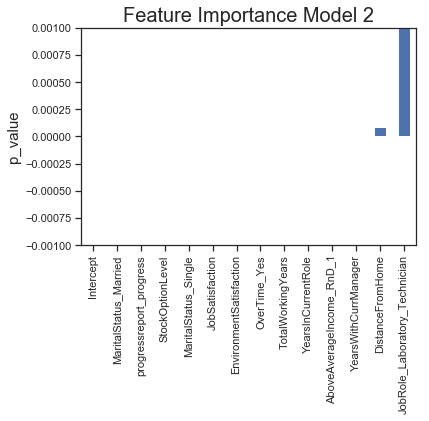

In [125]:
xmin=0
xmax=0
axes=plt.gca()
axes.set_ylim([xmin,xmax])
model2.pvalues.sort_values().plot(kind='bar')
plt.ylabel('p_value',fontsize=15)
plt.title('Feature Importance Model 2',fontsize=20)

In [126]:
model2.pvalues

Intercept                        1.910148e-48
AboveAverageIncome_RnD_1         1.632479e-06
DistanceFromHome                 8.273995e-05
EnvironmentSatisfaction          8.945588e-10
JobRole_Laboratory_Technician    1.021277e-03
JobSatisfaction                  9.944230e-12
MaritalStatus_Married            5.902424e-31
MaritalStatus_Single             7.943479e-14
OverTime_Yes                     4.645664e-09
StockOptionLevel                 1.393478e-15
TotalWorkingYears                4.188572e-08
YearsInCurrentRole               4.927756e-08
YearsWithCurrManager             1.089040e-05
progressreport_progress          2.609275e-17
dtype: float64

## HOW DIFFERENT FEATURE SELECTION CHANGES PERFORMANCE IN KNN ALGORITHM

In [127]:
X=HRATTRITION[HRATTRITION.columns.difference(['Attrition_Yes'])]
Y=HRATTRITION['Attrition_Yes']

In [128]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [129]:
lr = RandomForestRegressor(random_state=0)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=20, verbose =3 )
rfe.fit(X,Y)

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

RFE(estimator=RandomForestRegressor(random_state=0), n_features_to_select=20,
    verbose=3)

In [130]:
importantfeaturesbyrfe_20=X.columns[rfe.get_support()]

In [131]:
importantfeaturesbyrfe_20

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction',
       'MaritalStatus_Single', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime_Yes', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [132]:
train_X, test_X, train_y, test_y  = train_test_split(HRATTRITION[importantfeaturesbyrfe_20], Y, test_size=0.3, random_state=123)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc=sc.fit(train_X) 
final_data=pd.DataFrame(sc.fit_transform(train_X),columns=train_X.columns)
final_data_test_X = pd.DataFrame(sc.transform(test_X), columns = test_X.columns)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': [3,4,5,6,7,8,9,10], 'weights': ['uniform', 'distance']}
model=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,scoring='roc_auc')
model.fit(final_data,train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [133]:
model.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [134]:
model.best_score_

0.7201073762838469

In [135]:
from sklearn.model_selection import cross_val_score
np.mean((cross_val_score(KNeighborsClassifier(n_neighbors=10,weights='distance'),final_data,train_y,cv=10,scoring='roc_auc')))

0.7201073762838469

In [136]:
metrics.roc_auc_score(test_y,pd.DataFrame(model.predict_proba(final_data_test_X))[1])

0.7151864035087718

In [137]:
metrics.roc_auc_score(train_y,pd.DataFrame(model.predict_proba(final_data))[1])

1.0

In [138]:
print(metrics.classification_report(test_y, model.predict(final_data_test_X)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       384
           1       0.60      0.11      0.18        57

    accuracy                           0.88       441
   macro avg       0.74      0.55      0.56       441
weighted avg       0.85      0.88      0.84       441



In [139]:
print(metrics.classification_report(train_y, model.predict(final_data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       180

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



In [140]:
X[['JobLevel', 'StockOptionLevel', 'JobInvolvement',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']]=X[['JobLevel', 'StockOptionLevel', 'JobInvolvement',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].astype('float64')

C:\Users\riasa\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Final_list=list(X[importantfeaturesbyrfe_20].columns.difference(['Age','WorkLifeBalance','PercentSalaryHike','JobInvolvement','TotalWorkingYears']))

X_new=X[Final_list]
vif=pd.DataFrame()
vif['feature']=Final_list
vif['vif']=[variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
vif

,feature,vif
0,DailyRate,4.648764
1,DistanceFromHome,2.244735
2,EnvironmentSatisfaction,6.282431
3,HourlyRate,8.659237
4,JobSatisfaction,6.122222
5,MaritalStatus_Single,2.393648
6,MonthlyIncome,4.266797
7,MonthlyRate,4.695527
8,NumCompaniesWorked,2.299278
9,OverTime_Yes,1.407319


In [142]:
train_X, test_X, train_y, test_y  = train_test_split(HRATTRITION[Final_list], Y, test_size=0.3, random_state=123)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc=sc.fit(train_X) 
final_data=pd.DataFrame(sc.fit_transform(train_X),columns=train_X.columns)
final_data_test_X = pd.DataFrame(sc.transform(test_X), columns = test_X.columns)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': [3,4,5,6,7,8,9,10], 'weights': ['uniform', 'distance']}
np.random.seed(5)
model3=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,scoring='roc_auc')
model3.fit(final_data,train_y)
model3.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [143]:
model3.best_score_

0.6990771864301276

In [144]:
metrics.roc_auc_score(test_y,pd.DataFrame(model3.predict_proba(final_data_test_X))[1])

0.7442891081871346

In [145]:
metrics.roc_auc_score(train_y,pd.DataFrame(model3.predict_proba(final_data))[1])

1.0

In [146]:
print(metrics.classification_report(test_y, model3.predict(final_data_test_X)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       384
           1       0.52      0.19      0.28        57

    accuracy                           0.87       441
   macro avg       0.71      0.58      0.61       441
weighted avg       0.84      0.87      0.85       441



In [147]:
print(metrics.classification_report(train_y, model3.predict(final_data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       180

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



In [148]:
oversample_withrfe_vif = SMOTE(random_state=1)
Xvar_refe_vif,Yvar_rfe_vif=oversample_withrfe_vif.fit_resample(X_new,Y)
train_X, test_X, train_y, test_y  = train_test_split(Xvar_refe_vif, Yvar_rfe_vif, test_size=0.3, random_state=123)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc=sc.fit(train_X) 
final_data=pd.DataFrame(sc.fit_transform(train_X),columns=train_X.columns)
final_data_test_X = pd.DataFrame(sc.transform(test_X), columns = test_X.columns)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
param_grid={'n_neighbors': [3,4,5,6,7,8,9,10], 'weights': ['uniform', 'distance']}
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
model4=GridSearchCV(KNeighborsClassifier(),param_grid,cv=cv,scoring='roc_auc')
model4.fit(final_data,train_y)
model4.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [149]:
model4.best_score_

0.8950543253562916

In [150]:
metrics.roc_auc_score(train_y,pd.DataFrame(model4.predict_proba(final_data))[1])

1.0

In [151]:
metrics.roc_auc_score(test_y,pd.DataFrame(model4.predict_proba(final_data_test_X))[1])

0.8911938755307214

In [152]:
print(metrics.classification_report(test_y, model4.predict(final_data_test_X)))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       347
           1       0.70      0.96      0.81       393

    accuracy                           0.76       740
   macro avg       0.81      0.75      0.74       740
weighted avg       0.80      0.76      0.75       740



In [153]:
print(metrics.classification_report(train_y, model4.predict(final_data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       840

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



In [154]:
importantfeatures_featureselection_filter=HRATTRITION[list(chisquaretable.iloc[:15,0].values)+list(anova.iloc[:7,1].values)]

In [155]:
X[['JobLevel', 'StockOptionLevel', 'JobInvolvement',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']]=X[['JobLevel', 'StockOptionLevel', 'JobInvolvement',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].astype('float64')

C:\Users\riasa\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Final_list=list(X[importantfeatures_featureselection_filter.columns.difference(['JobLevel','Age','JobInvolvement','YearsAtCompany','WorkLifeBalance'])])

X_new=X[Final_list]
vif=pd.DataFrame()
vif['feature']=Final_list
vif['vif']=[variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
vif

,feature,vif
0,AboveAverageIncome_RnD_1,1.244972
1,BusinessTravel_Travel_Frequently,1.236316
2,DistanceFromHome,2.249554
3,EnvironmentSatisfaction,6.359935
4,JobRole_Laboratory_Technician,1.385938
5,JobRole_Research_Director,1.436032
6,JobRole_Sales_Representative,1.156702
7,JobSatisfaction,6.378802
8,MaritalStatus_Married,3.058550
9,MaritalStatus_Single,3.776720


In [157]:
oversample_withfilter_vif = SMOTE(random_state=1)
Xvar_filter_vif,Yvar_filter_vif=oversample_withfilter_vif.fit_resample(X_new,Y)
train_X, test_X, train_y, test_y  = train_test_split(Xvar_filter_vif, Yvar_filter_vif, test_size=0.3, random_state=123)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc=sc.fit(train_X) 
final_data=pd.DataFrame(sc.fit_transform(train_X),columns=train_X.columns)
final_data_test_X = pd.DataFrame(sc.transform(test_X), columns = test_X.columns)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': [3,4,5,6,7,8,9,10], 'weights': ['uniform', 'distance']}
model5=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,scoring='roc_auc')
model5.fit(final_data,train_y)
model5.best_score_

0.898960309353568

In [158]:
model5.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [159]:
model5=KNeighborsClassifier(n_neighbors=9,weights='distance').fit(final_data,train_y)

In [160]:
metrics.roc_auc_score(test_y,pd.DataFrame(model5.predict_proba(final_data_test_X))[1])

0.8952819881059756

In [161]:
metrics.roc_auc_score(train_y,pd.DataFrame(model5.predict_proba(final_data))[1])

1.0

In [162]:
print(metrics.classification_report(test_y, model5.predict(final_data_test_X)))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       347
           1       0.80      0.90      0.84       393

    accuracy                           0.82       740
   macro avg       0.83      0.82      0.82       740
weighted avg       0.83      0.82      0.82       740



In [163]:
print(metrics.classification_report(train_y, model5.predict(final_data)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       840

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



In [164]:
DecisionTreeClassifier?

Object `DecisionTreeClassifier` not found.


# CONVERT DATA INTO BALANCED DATA USING SMOTE FOR DECISION TREE

In [165]:
from imblearn.over_sampling import SMOTE
oversample_withfilter = SMOTE(random_state=1)
Xvar_filter,Yvar_filter=oversample_withfilter.fit_resample(X[importantfeatures_featureselection_filter.columns],Y)

In [166]:
train_X, test_X, train_y, test_y  = train_test_split(Xvar_filter, Yvar_filter, test_size=0.3, random_state=123)

In [167]:
train_X.head()

,OverTime_Yes,JobLevel,StockOptionLevel,MaritalStatus_Single,JobRole_Sales_Representative,JobInvolvement,progressreport_progress,BusinessTravel_Travel_Frequently,AboveAverageIncome_RnD_1,EnvironmentSatisfaction,...,MaritalStatus_Married,WorkLifeBalance,JobRole_Research_Director,TotalWorkingYears,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,YearsAtCompany,DistanceFromHome
559,1,1.0,1.000000,0,0,3.000000,1,0,0,4.000000,...,1,1.000000,0,6.000000,0.000000,3057.000000,38.000000,1.000000,1.000000,2.000000
1531,0,2.0,0.899348,0,0,2.100652,0,0,0,2.201303,...,0,3.000000,0,9.597393,7.194786,9728.091245,29.798697,6.496741,9.194786,2.207821
2105,1,2.0,1.515451,0,0,2.989700,1,0,0,2.000000,...,0,3.000000,0,12.041202,2.989700,6264.145487,41.443347,2.494850,3.484549,19.927897
348,0,4.0,0.000000,1,0,3.000000,1,0,0,1.000000,...,0,3.000000,1,16.000000,0.000000,15992.000000,42.000000,0.000000,1.000000,23.000000
2456,0,1.0,0.000000,1,0,2.375098,1,0,0,1.750197,...,0,3.624902,0,1.000000,0.624902,1875.879427,19.000000,0.000000,0.624902,9.249803


In [168]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export


C:\Users\riasa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [169]:
DecisionTreeClassifier?

In [170]:
#  growing the tree without any hyperameter 

In [171]:
clf_tree = DecisionTreeClassifier(random_state=2)
clf_tree.fit( train_X, train_y )
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
export_graphviz( clf_tree,
              out_file = "ibmhr_treeno_hyperparameter.odt",
              feature_names = train_X.columns )
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'ibmhr_treeno_hyperparameter.odt' )
chd_tree_graph.write_jpg('ibmhr_treeno_hyperameter.jpg' )

True

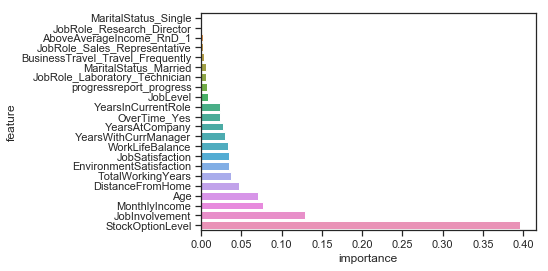

In [172]:
# get importance
importance = np.argsort(clf_tree.feature_importances_)[::1]

feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[importance[f]],
                         clf_tree.feature_importances_[importance[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [173]:
metrics.roc_auc_score(test_y,pd.DataFrame(clf_tree.predict_proba(test_X)).iloc[:,1])

0.8403509543817967

In [174]:
metrics.roc_auc_score(train_y,pd.DataFrame(clf_tree.predict_proba(train_X)).iloc[:,1])

1.0

In [175]:
clf_tree1 = DecisionTreeClassifier(max_depth=4 ,random_state=2)
clf_tree1.fit( train_X, train_y )


DecisionTreeClassifier(max_depth=4, random_state=2)

In [176]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
export_graphviz( clf_tree,
              out_file = "ibmhr_tree.odt",
              feature_names = train_X.columns )

In [177]:
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'ibmhr_tree.odt' )

In [178]:
chd_tree_graph.write_jpg('ibmhr_tree.jpg' )

True

In [179]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree1.predict( train_X ) } )

In [180]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree1.predict( test_X ) } )

In [181]:
metrics.roc_auc_score(test_y,pd.DataFrame(clf_tree1.predict_proba(test_X)).iloc[:,1])

0.8707569791231274

In [182]:
metrics.roc_auc_score(train_y,pd.DataFrame(clf_tree1.predict_proba(train_X)).iloc[:,1])

0.8988437869504462

In [183]:
print(metrics.classification_report(test_y, clf_tree1.predict(test_X)))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       347
           1       0.78      0.80      0.79       393

    accuracy                           0.77       740
   macro avg       0.77      0.77      0.77       740
weighted avg       0.77      0.77      0.77       740



In [184]:
param_grid = {'max_depth': np.arange(4, 10),
             'max_features': np.arange(3,8),'min_samples_leaf':np.arange(20,50)}

# 6*5*30*5=4500 models

In [185]:
cv=StratifiedKFold(n_splits=5)
tree = GridSearchCV(DecisionTreeClassifier(random_state=2), param_grid, cv = cv,scoring='roc_auc')
tree.fit( train_X, train_y )

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'max_features': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='roc_auc')

In [186]:
GridSearchCV?

In [187]:
tree.best_params_

{'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 23}

In [188]:
tree.best_score_

0.8734380337229796

In [189]:
np.std(cross_val_score(DecisionTreeClassifier(max_depth=9,max_features=6,min_samples_leaf=23,random_state=2),train_X,train_y,cv=5,scoring='roc_auc'))

0.010302743298804158

In [190]:
clf_tree1 = DecisionTreeClassifier(max_depth=9,max_features=6,min_samples_leaf=23,random_state=2)
clf_tree1.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=9, max_features=6, min_samples_leaf=23,
                       random_state=2)

In [191]:
metrics.roc_auc_score(test_y,pd.DataFrame(clf_tree1.predict_proba(test_X)).iloc[:,1])

0.8193164235797935

In [192]:
metrics.roc_auc_score(train_y,pd.DataFrame(clf_tree1.predict_proba(train_X)).iloc[:,1])

0.9095567290121466

In [193]:
train_X.iloc[1]

OverTime_Yes                           0.000000
JobLevel                               2.000000
StockOptionLevel                       0.899348
MaritalStatus_Single                   0.000000
JobRole_Sales_Representative           0.000000
JobInvolvement                         2.100652
progressreport_progress                0.000000
BusinessTravel_Travel_Frequently       0.000000
AboveAverageIncome_RnD_1               0.000000
EnvironmentSatisfaction                2.201303
JobRole_Laboratory_Technician          0.000000
JobSatisfaction                        1.201303
MaritalStatus_Married                  0.000000
WorkLifeBalance                        3.000000
JobRole_Research_Director              0.000000
TotalWorkingYears                      9.597393
YearsInCurrentRole                     7.194786
MonthlyIncome                       9728.091245
Age                                   29.798697
YearsWithCurrManager                   6.496741
YearsAtCompany                         9

In [194]:
pd.concat([train_y.reset_index().drop('index',axis=1),pd.DataFrame(clf_tree1.predict_proba(train_X))[0]],axis=1)

,Attrition_Yes,0
0,0,0.464286
1,1,0.045455
2,1,0.045455
3,0,0.960000
4,1,0.000000
5,0,0.941176
6,0,0.793103
7,1,0.857143
8,0,0.760000
9,1,0.000000


In [195]:
print(metrics.classification_report(train_y, clf_tree1.predict(train_X)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       886
           1       0.83      0.80      0.81       840

    accuracy                           0.82      1726
   macro avg       0.82      0.82      0.82      1726
weighted avg       0.82      0.82      0.82      1726



In [196]:
print(metrics.classification_report(test_y, clf_tree1.predict(test_X)))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       347
           1       0.74      0.74      0.74       393

    accuracy                           0.72       740
   macro avg       0.72      0.72      0.72       740
weighted avg       0.72      0.72      0.72       740



In [197]:
export_graphviz( clf_tree1,
              out_file = "ibmhr_treefinal.odt",
              feature_names = train_X.columns )
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'ibmhr_treefinal.odt' )
chd_tree_graph.write_jpg('ibmhr_treefinal.jpg' )

True

# MORE STABLE MODEL 
# HYPERAMETER TUNING


In [198]:
param_grid = {'max_depth': np.arange(4, 7),
             'min_samples_leaf':np.arange(20,50),'max_leaf_nodes':np.arange(10,15),'random_state':[2]}

In [199]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,scoring='roc_auc')
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([4, 5, 6]),
                         'max_leaf_nodes': array([10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'random_state': [2]},
             scoring='roc_auc')

In [200]:
tree.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 14,
 'min_samples_leaf': 24,
 'random_state': 2}

In [201]:
tree.best_score_

0.896082208830971

In [202]:
clf_tree2 = DecisionTreeClassifier(max_depth=6,max_leaf_nodes=14,min_samples_leaf=20)
clf_tree2.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=14, min_samples_leaf=20)

In [203]:
print(metrics.classification_report(test_y, clf_tree2.predict(test_X)))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       347
           1       0.91      0.76      0.83       393

    accuracy                           0.83       740
   macro avg       0.84      0.84      0.83       740
weighted avg       0.84      0.83      0.83       740



In [204]:
metrics.roc_auc_score(test_y,pd.DataFrame(clf_tree2.predict_proba(test_X)).iloc[:,1])

0.9022262797808919

In [205]:
metrics.roc_auc_score(train_y,pd.DataFrame(clf_tree2.predict_proba(train_X)).iloc[:,1])

0.9146693270987853

In [206]:
export_graphviz( clf_tree2,
              out_file = "ibmhr_treefinal2.odt",
              feature_names = train_X.columns )
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'ibmhr_treefinal2.odt' )
chd_tree_graph.write_jpg('ibmhr_treefinal2.jpg' )

True

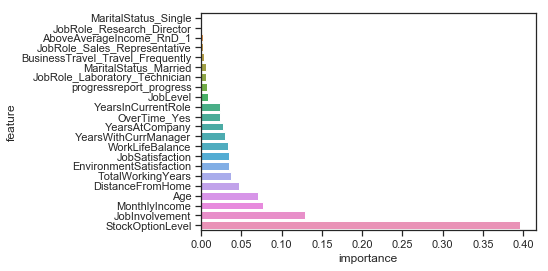

In [207]:
# get importance
importance = np.argsort(clf_tree.feature_importances_)[::1]

feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[importance[f]],
                         clf_tree.feature_importances_[importance[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )


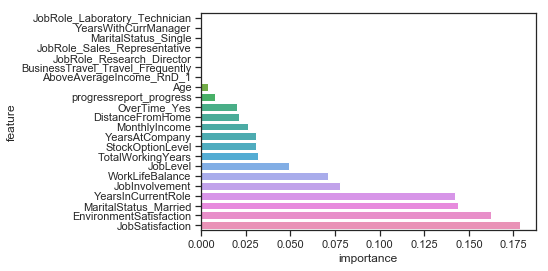

In [208]:
# get importance
importance = np.argsort(clf_tree1.feature_importances_)[::1]

feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[importance[f]],
                         clf_tree1.feature_importances_[importance[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

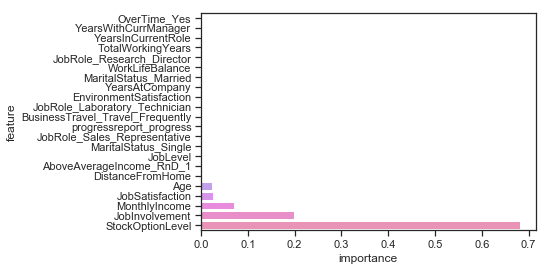

In [209]:
# get importance
importance = np.argsort(clf_tree2.feature_importances_)[::1]

feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[importance[f]],
                         clf_tree2.feature_importances_[importance[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [210]:
export_graphviz( clf_tree,
              out_file = "ibmhr_treefinal0.odt",
              feature_names = train_X.columns )
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'ibmhr_treefinal0.odt' )
chd_tree_graph.write_jpg('ibmhr_treefinal0.jpg' )

True

In [211]:
train_X.head()

,OverTime_Yes,JobLevel,StockOptionLevel,MaritalStatus_Single,JobRole_Sales_Representative,JobInvolvement,progressreport_progress,BusinessTravel_Travel_Frequently,AboveAverageIncome_RnD_1,EnvironmentSatisfaction,...,MaritalStatus_Married,WorkLifeBalance,JobRole_Research_Director,TotalWorkingYears,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,YearsAtCompany,DistanceFromHome
559,1,1.0,1.000000,0,0,3.000000,1,0,0,4.000000,...,1,1.000000,0,6.000000,0.000000,3057.000000,38.000000,1.000000,1.000000,2.000000
1531,0,2.0,0.899348,0,0,2.100652,0,0,0,2.201303,...,0,3.000000,0,9.597393,7.194786,9728.091245,29.798697,6.496741,9.194786,2.207821
2105,1,2.0,1.515451,0,0,2.989700,1,0,0,2.000000,...,0,3.000000,0,12.041202,2.989700,6264.145487,41.443347,2.494850,3.484549,19.927897
348,0,4.0,0.000000,1,0,3.000000,1,0,0,1.000000,...,0,3.000000,1,16.000000,0.000000,15992.000000,42.000000,0.000000,1.000000,23.000000
2456,0,1.0,0.000000,1,0,2.375098,1,0,0,1.750197,...,0,3.624902,0,1.000000,0.624902,1875.879427,19.000000,0.000000,0.624902,9.249803


# Ensemble Modelling

In [212]:
from sklearn.ensemble import BaggingClassifier

In [213]:
# BaggingClassifier(
#     ['base_estimator=None', 'n_estimators=10', '*', 'max_samples=1.0', 'max_features=1.0', 
#      'bootstrap=True', 'bootstrap_features=False', 'oob_score=False', 'warm_start=False', 'n_jobs=None',
#      'random_state=None', 'verbose=0'],
# )

In [214]:
train_X.head()

,OverTime_Yes,JobLevel,StockOptionLevel,MaritalStatus_Single,JobRole_Sales_Representative,JobInvolvement,progressreport_progress,BusinessTravel_Travel_Frequently,AboveAverageIncome_RnD_1,EnvironmentSatisfaction,...,MaritalStatus_Married,WorkLifeBalance,JobRole_Research_Director,TotalWorkingYears,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,YearsAtCompany,DistanceFromHome
559,1,1.0,1.000000,0,0,3.000000,1,0,0,4.000000,...,1,1.000000,0,6.000000,0.000000,3057.000000,38.000000,1.000000,1.000000,2.000000
1531,0,2.0,0.899348,0,0,2.100652,0,0,0,2.201303,...,0,3.000000,0,9.597393,7.194786,9728.091245,29.798697,6.496741,9.194786,2.207821
2105,1,2.0,1.515451,0,0,2.989700,1,0,0,2.000000,...,0,3.000000,0,12.041202,2.989700,6264.145487,41.443347,2.494850,3.484549,19.927897
348,0,4.0,0.000000,1,0,3.000000,1,0,0,1.000000,...,0,3.000000,1,16.000000,0.000000,15992.000000,42.000000,0.000000,1.000000,23.000000
2456,0,1.0,0.000000,1,0,2.375098,1,0,0,1.750197,...,0,3.624902,0,1.000000,0.624902,1875.879427,19.000000,0.000000,0.624902,9.249803


In [215]:
for i in np.arange(50,1000,100):
    bagtree=BaggingClassifier(n_estimators=i,oob_score=True,random_state=1).fit(train_X,train_y)
    print(f' n_estimator {i} oob_score {bagtree.oob_score_}')
    
    

 n_estimator 50 oob_score 0.8962920046349943
 n_estimator 150 oob_score 0.9038238702201622
 n_estimator 250 oob_score 0.9096176129779838
 n_estimator 350 oob_score 0.9073001158748552
 n_estimator 450 oob_score 0.9084588644264194
 n_estimator 550 oob_score 0.906720741599073
 n_estimator 650 oob_score 0.9096176129779838
 n_estimator 750 oob_score 0.9078794901506373
 n_estimator 850 oob_score 0.9107763615295481
 n_estimator 950 oob_score 0.9107763615295481


In [216]:
train_X.shape[1]

22

In [426]:
# the out of bag score says if we have 410 no of trees to be bulit will give us a good out of score
#The grid search CV gives 360 as the best hyperameter, which also gives 91% as oob_score

In [217]:
param_grid={'n_estimators':np.arange(50,1000,100)}
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
model4=GridSearchCV(BaggingClassifier(random_state=1,warm_start=True),param_grid,cv=cv,scoring='roc_auc')
model4.fit(train_X,train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=BaggingClassifier(random_state=1, warm_start=True),
             param_grid={'n_estimators': array([ 50, 150, 250, 350, 450, 550, 650, 750, 850, 950])},
             scoring='roc_auc')

In [218]:
model4.best_params_

{'n_estimators': 950}

In [219]:
model4.best_score_

0.9575846496668128

In [222]:
model_bagging1=BaggingClassifier(random_state=1,warm_start=False,oob_score=True,n_estimators=950)
model_bagging1.fit(train_X,train_y)

BaggingClassifier(n_estimators=950, oob_score=True, random_state=1)

In [224]:
metrics.roc_auc_score(test_y,pd.DataFrame(model_bagging1.predict_proba(test_X)).iloc[:,1])

0.9602884777555346

In [225]:
metrics.roc_auc_score(train_y,pd.DataFrame(model_bagging1.predict_proba(train_X)).iloc[:,1])

1.0

In [226]:
print(metrics.classification_report(test_y, model_bagging1.predict(test_X)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       347
           1       0.92      0.87      0.90       393

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



In [227]:
print(metrics.classification_report(train_y, model_bagging1.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       840

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



In [231]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {'max_depth': np.arange(4, 7),
             'min_samples_leaf':np.arange(20,50),'max_leaf_nodes':np.arange(10,15),'random_state':[2]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = 
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [259]:
param_grid = {'max_depth': np.arange(4, 7),
             'min_samples_leaf':np.arange(20,50),'max_leaf_nodes':np.arange(10,15),'random_state':[2],'n_estimators':np.arange(50,1000,100),'max_features':["sqrt","auto"]}


In [260]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=1), param_distributions = param_grid,  cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [261]:
rf_random.fit(train_X,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([4, 5, 6]),
                                        'max_features': ['sqrt', 'auto'],
                                        'max_leaf_nodes': array([10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_estimators': array([ 50, 150, 250, 350, 450, 550, 650, 750, 850, 950]),
                                        'random_state': [2]},
                   random_state=42, verbose=2)

In [262]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=5, max_leaf_nodes=14, min_samples_leaf=23,
                       n_estimators=450, random_state=2)

In [263]:
rf_random.best_score_

0.8464790148278463

In [243]:
param_grid_2 = {'max_depth': np.arange(5, 20),
             'min_samples_leaf':np.arange(1,10),'max_leaf_nodes':np.arange(100,150),'random_state':[2],'n_estimators':np.arange(50,1000,100),'max_features':['sqrt','auto']}


In [265]:
from sklearn.model_selection import RandomizedSearchCV
rf_random_2 = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=1), param_distributions = param_grid_2,  cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random_2.fit(train_X,train_y)                            

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_features': ['sqrt', 'auto'],
                                        'max_leaf_nodes': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 150, 250, 350, 450, 550, 650, 750, 850, 950]),
                                        'random_state': [2]},
                   random_state=42, verbose=2)

In [271]:
rf_random_2.best_estimator_

RandomForestClassifier(max_depth=17, max_features='sqrt', max_leaf_nodes=125,
                       min_samples_leaf=2, n_estimators=850, random_state=2)

In [266]:
rf_random_2.best_params_,rf_random_2.best_score_

({'random_state': 2,
  'n_estimators': 850,
  'min_samples_leaf': 2,
  'max_leaf_nodes': 125,
  'max_features': 'sqrt',
  'max_depth': 17},
 0.8997821898299406)

In [267]:
metrics.roc_auc_score(test_y,pd.DataFrame(rf_random_2.predict_proba(test_X)).iloc[:,1])

0.9581655923913442

In [268]:
metrics.roc_auc_score(train_y,pd.DataFrame(rf_random_2.predict_proba(train_X)).iloc[:,1])

0.9985837901752123

In [269]:
print(metrics.classification_report(train_y, rf_random_2.predict(train_X)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       886
           1       0.99      0.96      0.98       840

    accuracy                           0.98      1726
   macro avg       0.98      0.98      0.98      1726
weighted avg       0.98      0.98      0.98      1726



In [270]:
print(metrics.classification_report(test_y, model_bagging1.predict(test_X)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       347
           1       0.92      0.87      0.90       393

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



In [291]:
param_grid_3 = {'n_estimators':np.arange(50,1000,100),'max_features':['sqrt','auto']}


In [292]:
from sklearn.model_selection import RandomizedSearchCV
rf_random_3 = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=1), param_distributions = param_grid_3,  cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random_3.fit(train_X,train_y)   

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['sqrt', 'auto'],
                                        'n_estimators': array([ 50, 150, 250, 350, 450, 550, 650, 750, 850, 950])},
                   random_state=42, verbose=2)

In [293]:
rf_random_3.best_estimator_

RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=1)

In [301]:
rf_model_3_=RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=1)
rf_model_3_.fit(train_X,train_y)

RandomForestClassifier(max_features='sqrt', n_estimators=150, random_state=1)

In [295]:
rf_random_3.best_score_

0.9067336851805312

In [302]:
metrics.roc_auc_score(test_y,pd.DataFrame(rf_model_3_.predict_proba(test_X)).iloc[:,1])

0.9658541772077641

In [303]:
metrics.roc_auc_score(train_y,pd.DataFrame(rf_model_3_.predict_proba(train_X)).iloc[:,1])

1.0

In [284]:
print(metrics.classification_report(train_y, rf_random_3.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       840

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



In [285]:
print(metrics.classification_report(test_y, rf_random_3.predict(test_X)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       347
           1       0.93      0.89      0.91       393

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740



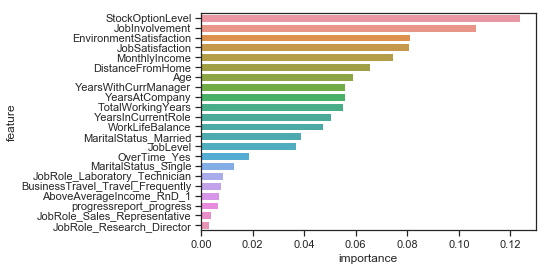

In [305]:
indices = np.argsort(rf_model_3_.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         rf_model_3_.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )